<a ><img src="https://cdn.tuinvest.de/assets/logos/TUInvest_Logo-353d42494757660b8381a31c9f99a6ca.png"  width="200" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> INTERNAL USE ONLY </span> </h3> </div>

<br>
<br>
<br>

<a ><img src="Pictures/QSeries.png" Width="300" align="center"> </a>

<br>
<br>



<h1><center>AlgoTrading 101 — A hands-on Introduction</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#022F73'> Lecture 2: Model Selection and Discussion </font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>


<h4>About this Notebook</h4>
The Objective of this Lecture is a comprehensible hands-on Introduction to Algo Trading <br>
for the members of TU Invest, to raise curiosity and resurrect Alternative Strategies/Assets.

Although the material used is not fit to  *understand*  for beginners, with easier strategies <br>
there won't be a profitable among them. Thus the mathematics statistics behind the following  <br>
stratgies might be hard to understand but not to implement. And I hope this will lead some  <br>
curious minds to further study the concepts more thoroughly. <br>
<br>


---
---
<div style="text-align: center"> <h3><span style="color:red"> WORKING DRAFT</span> </h3> </div>

---
---


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#022F73">
    <span style="color:#022F73">
     <ol>
       <li><a href="#1"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >The Basic Strategies as Foundation</span> </a></li> 
       <ol>
       <li><a href="#19"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Mean Reversion and Moving average</span> </a></li>
       <li><a href="#2"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Trend Based: Momentum</span> </a></li>
       <li><a href="#3"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Pairs Trading</span> </a></li>
       <li><a href="#20"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Long-Short-Equity</span> </a></li>
       </ol>   
       <li><a href="#4"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Advanced Manipulation to gain an Edge</span> </a></li> 
       <ol>
       <li><a href="#5"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Hurst Exponents </span> </a></li>
       <li><a href="#6"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Ornstein-Uhlenbeck </span> </a></li>
       <li><a href="#7"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Kalman Filter </span> </a></li>    
       <li><a href="#8"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Haar Transformation </span> </a></li>
       <li><a href="#9"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Exponential Smoothing </span> </a></li> 
       </ol>
       <li><a href="#10"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Artificial Intelligence</span> </a></li>
       <ol>
       <li><a href="#11"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Deep Neural Networks (DNN)</span> </a></li>
       <li><a href="#12"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Gradient-Boosted-Trees (GBT)</span> </a></li>
       <li><a href="#13"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Random Forests (RAF)</span> </a></li>
       <li><a href="#14"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Reinforcement Learning (RL)</span> </a></li>
       </ol>
       <li><a href="#15"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Positions</span> </a></li>
       <ol>
        <li><a href="#16"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Thresholds for Entry and Exit</span> </a></li>
       <li><a href="#17"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Position Sizing</span> </a></li>
       <li><a href="#18"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Leverage</span> </a></li>
       </ol>
   </ol>
    </span>
</div>

In [3]:
import numpy as np
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import backtester
import statsmodels
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import coint, adfuller
from scipy import stats
from datetime import datetime
from backtester.dataSource.yahoo_data_source import YahooStockDataSource

# 1. The two Basic Strategies <a id="1"></a>

## A. Mean Reversion and Moving Average <a id="19"></a>

### Mean reversion Models

Mean-reversion strategies work on the assumption that the price of an asset is prone to random fluctuation around an underlying stable trend. Therefore, values deviating far from the trend or observed mean will tend to reverse direction and revert to the mean. If the value is unusually high, we expect it to go back down and go up if it is unusually low. 


### Single-stock mean reversion

Mean reversion in the context of a stock price implies that periods of the price being far below the mean are followed by periods of the price going up, and vice versa. We can take advantage of this by buying the stock to go long when the price is lower than expected, and selling to go short when the price is higher than expected. We can plot the price of a stock along with the mean of the prices up to each day to see whether the price reverts to the mean.

Note that since we are computing the running average, "reverting to the mean" does not necessarily mean going as high or as low as it did before.

In order to trade using this strategy, we need to quantify what it means for the price to be higher or lower than expected. It's useful to compute the z-score of the price on each day, which tells us how many standard deviations away from the mean a value is:

 $$ z=\frac{x-\mu}{\sigma} $$

where $x$ is the value, $\mu$ is the mean of the data set, and $\sigma$ is its standard deviation. So a price with a z-score $> 1$ is more than one standard deviation above the mean, and we will sell short when this happens. If the price on a day has a z-score $< 1$, we will buy long. If the price is within half a standard deviation of the mean, we will clear all positions.

The danger of applying mean reversion to a single stock is that it exposes us to the movement of the market and the success or failure of the individual company, among other factors. If there is a persistent trend affecting the price of the security, we will find ourselves consitently undervaluing (if the price is moving steadily upward) or overvaluing (if the price is falling) the asset.

### Mean reversion portfolio

Instead of taking the mean of the historical returns on an asset, we can look at the mean of the returns on all of the stocks in, say, the S&P 500. Hypothesizing that the worst-performing stocks last period will do better this period (that is, they are likely to be undervalued) and vice versa, we go long in stocks that performed poorly and short in stocks that performed well.

This approach has the advantage of being market-neutral, so that we do not treat stocks as undervalued just because the market as a whole is falling, or overvalued when the market is rising. Furthermore, by including a large number of securities in portfolio, we are likely to encounter many cases where our prediction is correct.

To construct a portfolio which takes advantage of mean reversion, we first select a universe, such as all S&P 500 stocks or the top-traded stocks on the NYSE. From this universe, we rebalance our portfolio every period (say, every week) by going short in the stocks in the bottom 20% of returns over the last period and long in the stocks in the top 20% of returns. If a stock is in neither of those quintiles, we do not include it in our portfolio.

### Moving Average in Pairs trading

In pairs trading, the quantity we are examining is the distance between two securities, which we expect to revert back to its mean. For this to be a reasonable assumption, we need the two securities to be statistically <i>cointegrated</i>. In practice, two companies whose products are substitutes for each other are often cointegrated. That is, they generally move together due to shifts in the market and in their specific industry, and move little relative to each other.

How do we incorporate the prediction about their difference into our portfolio? Suppose we are looking at two securities X and Y. Then we go long in X and short in Y when the two are closer together than expected, and short in X and long in Y when the two are far apart. In this way we remain neutral to the market, industry, and other shifts that cause X and Y to move together, while making money on their difference reverting to the mean. We can quantify "closer than expected" as the difference having a z-score of less than -1, and "farther apart than expected" as a z-score greater than 1. This is easier to picture if X's price is higher than Y's, but the end result is the same in either case.

In some cases, we may instead want our mean to refer only to the moving average, excluding data from too long ago. 

From here our trading strategy is identical to that for a single security, where we replace the asset with the spread X-Y. When we short the spread, we buy Y and sell X, and vice versa for going long. We'll be using the CMA for the mean, but you can easily change it to see the difference. Keep in mind, however, that what works well with this data may not be suited for other situations, and each definition of the mean will sometimes outperform the other.

### Alternative approaches

Mean-reversion strategies assume that trends tend to reverse direction. On the opposite end of the spectrum are trend-following or momentum-based strategies. These hypothesize that prices will, despite fluctuations, generally move in the direction they were moving in before. They can also take into account how quickly a price is moving, and anticipate changes in the direction of movement when it slows down. These are covered in more detail in another notebook.

---
---

## B. Trend Based Strategies <a id="2"></a>

### Momentum Strategies

---
Momentum trading refers to a general class of strategies which extrapolate from existing trends. They assume that stocks which are going up will continue to go up and stocks which are going down will continue going down, and buy and sell accordingly. This is in contrast to mean-reversion strategies, which rely on trends reversing direction.

For instance, below we see the price of an asset fluctuating but overall going up.

### Momentum and Auto-Correlation

Many things in finance are autocorrelated. An intuitive explanation for this is that prices are determined by traders, which take into account past prices when determining new ones. The formula might be

$$P_t = T_t + \epsilon$$
$$T_t = X + P_{1, t-1}$$
$$P_t = X + P_{1, t-1} + \epsilon$$

Where X covers all the other factors traders consider and $\epsilon$ is random noise. This is the definition of an autocorrelated series, in which the value at time $t$ depends on previous values.

Some forms of autocorrelation will not exhibit momentum behavior. For instance, a very simple autocorrelation relation could be as follows.

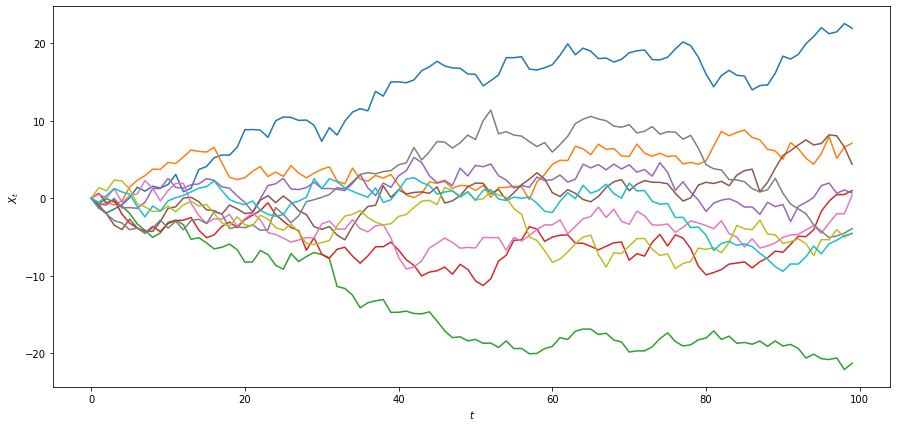

In [15]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(N-1):
        X[i+1] = X[i] + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(100)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

These series will not exhibit momentum behavior, as the amount they go up and down each timestep is purely random. However, if the series' returns are autocorrelated, then we will see momentum behavior. We can simulate this as follows.

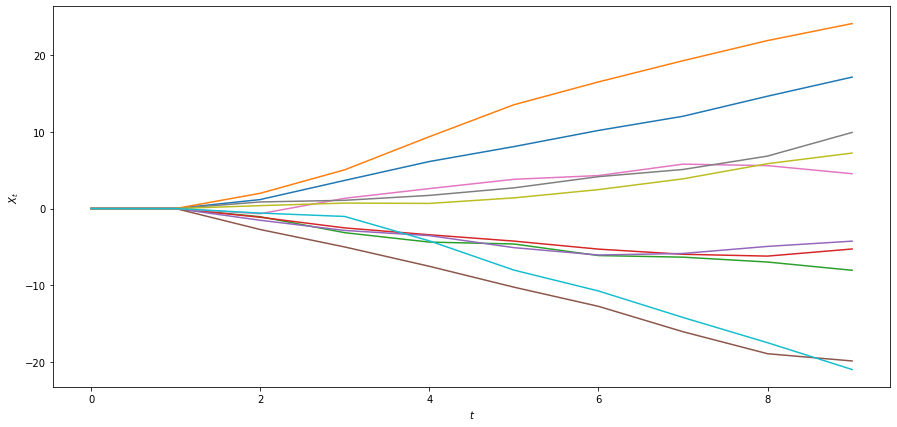

In [16]:
def generate_autocorrelated_values(N):
    X = np.zeros(N)
    for i in range(1, N-1):
        # Do the past returns 'look good' to investors
        past_returns = X[i] - X[i-1]
        # Investors hypothesize that future returns will be equal to past returns and buy at that price
        X[i+1] = X[i] + past_returns + np.random.normal(0, 1)
    return X

plt.figure(figsize=(15,7))
for i in range(10):
    X = generate_autocorrelated_values(10)
    plt.plot(X)
plt.xlabel('$t$')
plt.ylabel('$X_t$');
plt.show()

It's now clear to see that if investors incorporate information about past returns into the future price, we will see momentum behavior. Obviously in real data this will be far more noisy and difficult to observe.

### Testing for Autocorrelation

We can test for autocorrelation in a few ways. One is by checking for a unit root. If the series has a unit root, we should be worried that there is autocorrelation present.

In [17]:
from statsmodels.tsa.stattools import adfuller

X1 = generate_autocorrelated_values(100)
X2 = np.random.normal(0, 1, 100)

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print ('X1')
_, pvalue, _, _, _, _ = adfuller(X1)
if pvalue > 0.05:
    print ('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print ('We reject the null hypothesis that the series has a unit root.')
print ('X2')
_, pvalue, _, _, _, _ = adfuller(X2)
if pvalue > 0.05:
    print ('We cannot reject the null hypothesis that the series has a unit root.')
else:
    print ('We reject the null hypothesis that the series has a unit root.')

X1
We cannot reject the null hypothesis that the series has a unit root.
X2
We reject the null hypothesis that the series has a unit root.


### Momentum vs. Mean Reversion

Momentum and mean reversion are in a sense opposite strategies. In a momentum model one hypothesizes that past upwards movement is indicative of future upwards movement. In a mean reversion model one hypothesizes that past upward trends are simply temporary overvaluings and the price will return to normal. Both are important models that work in different cases.

It is important to check for which kind of behavior might be present in your data before you actually try developing a strategy based on that.

### Time Frame is Important

Momentum behavior and mean reversion behavior can both occur in the same asset. Take for example AAPL again. We can see a trend upwards, but there is also movement around that trend. One approach could be to buy an hold AAPL and attempt to make money on the longer timeframe. Another approach would be to buy AAPL whenever it went under the trendline and sell it whenever it was beneath. This strategy would work on shorter timeframes.

Processing data for stock: AAPL
20% done...
40% done...
60% done...
80% done...


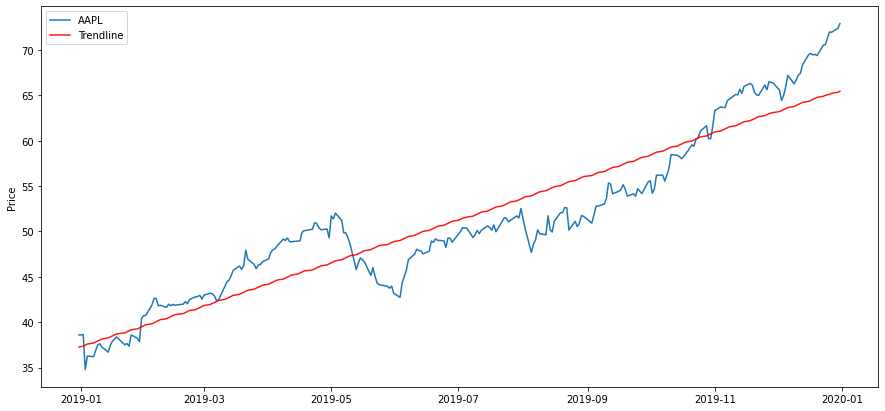

In [20]:
# Load pricing data for an asset


startDateStr = '2019/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'

instrumentIds = ['AAPL']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
prices = ds.getBookDataByFeature()['adjClose']
dates = prices.index

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(prices['AAPL'])

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X) # Add a column of ones so that line can have a y-intercept
model = regression.linear_model.OLS(prices['AAPL'], x).fit()
a = model.params[0] # Get coefficients of line
b = model.params[1]
prices['Y_hat'] = X * b + a
plt.plot(prices['Y_hat'], 'r', alpha=0.9);
plt.ylabel('Price')
plt.legend(['AAPL', 'Trendline']);
plt.show()

To see how a mean reversion signal might look, let's look at the difference between the asset and the prediction. Sure enough, looks like some good opportunity for mean reversion as the price difference crosses the zero line many times.

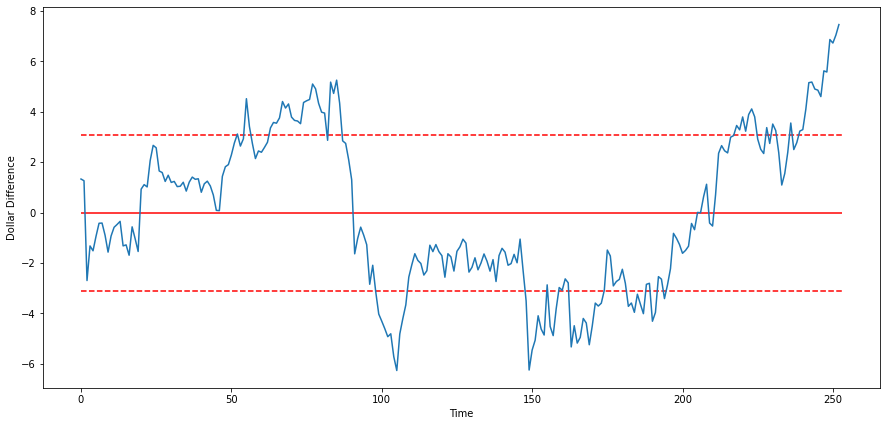

In [21]:
plt.figure(figsize=(15,7))
plt.plot((prices['AAPL'] - prices['Y_hat']).values)
plt.hlines(np.mean(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r')
plt.hlines(np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.hlines(-np.std(prices['AAPL'] - prices['Y_hat']), 0, len(dates), colors='r', linestyles='dashed')
plt.xlabel('Time')
plt.ylabel('Dollar Difference')
plt.show()

#### Time Frame is Important for Predictive Capacity

Each momentum measure will be predictive over different time horizons. Some over years and some over days. This will also be true of different asset classes. Some asset classes have momentum over years and some over days. It is important, when constructing a momentum model, to keep in mind what time frame makes sense. That time frame should be roughly the time frame on which you rebalance/exit the trade. It should also be the time frame you use when measuring predictive capacity of your model.

#### IMPORTANT: Model Selection

It is important not to fall prey to statistical biases by throwing a lot of models at a dataset and seeing which fit. To understand why this is true, see The Dangers of Overfitting. In short, if you throw a lot of models at a dataset, one will likely happen to look good based on random chance. This model will not have predictive power on any new data, just the data you've already seen.

A better approach is to let your model creation be driven by underlying things you know to be true about your data. For instance, here is a good development path:
1. Hypothesize that based on investor psychology, certain stocks should exhibit momentum behavior.
2. Construct a mathemtical model that follows this hypothesis.
3. Test your hypothesis by seeing if that model fits your data well.
4. Test your model out of sample on new data you've never seen before.

### Trading on Momentum

#### Measuring Momentum

To trade on momentum, we must first be able to measure it. For information on how to measure momentum, please see the Measuring Momentum notebook. Various ways to quantify momentum will be discussed there. We will discuss what you might do once you have developed a measure of momentum here.

All following examples will assume that a good measure of momentum $p$, has been developed. The notation $p(A_t)$ will denote the momentum of asset $A$ and time $t$.

#### Entry and Exit Signals

One way to use momentum is to have cutoffs and enter a position when momentum is significantly high, and leave it when momentum is significantly low. The can be done for shorting stocks as well if momentum is in the negative direction. Good examples of this would be moving average crossover strategies, as discussed in the Measuing Momentum.

#### Ranking Stocks for Long-Short Baskets

Another approach is to use momentum as a factor for ranking stocks. The general approach and its benefits are descrbed in the Long-Short Equity and Ranking Universes by Factors. In short, you make a bet that stocks with higher momentum will outperform those with lower momentum. This tends to be more market neutral and robust. Momentum could also be used as one of many factors in a ranking scheme.

#### Cross-Sectional Momentum

Cross sectional momentum is when rather than looking at absolute momentum, you look at momentum of every stock relative to every other stock. This has the advantage of providing a relative scale, rather than a somewhat meaningless absolute measure of momentum.

---

### Measures of Momentum From Physics

Here we present some measures of momentum taken from physics. The paper describing these measures can be found here http://arxiv.org/pdf/1208.2775.pdf. The authors define 4 different measures, called $p^{(1)}$, $p^{(0)}$, $p^{(2)}$, and $p^{(3)}$.

Their approach is based in physics, where the momentum is defined as $p = mv$, the product of the mass and the velocity. First, they define $x(t)$ to be the log of the price of the security. Conveniently, the return on the security is then the derivative of $x(t)$, which is called the velocity $v(t)$. Then they suggest a number of different definitions of mass $m(t)$; in the examples below, we'll use the inverse of standard deviation and turnover rate as mass. This works with our analogy because the more volatile or the less liquid an asset (the smaller its mass), the easier it is to move its price (i.e. change its position). The different momenta are then defined (for a lookback window $k$) as:
$$p^{(0)}(t) = \sum_{i=0}^{k-1} v(t-i)$$
$$p^{(1)}(t) = \sum_{i=0}^{k-1} m(t-i) v(t-i)$$
$$p^{(2)}(t) = \frac{\sum_{i=0}^{k-1} m(t-i) v(t-i)}{\sum_{i=0}^{k-1} m(t-i)}$$
$$p^{(3)}(t) = \frac{\mu(v(t-k+1),\ldots, v(t))}{\sigma(v(t-k+1),\ldots, v(t))} $$
```js
p0 = v.rolling(window=k, center=False).sum()
p1 = m*v.rolling(window=k, center=False).sum()
p2 = p1/m.rolling(window=k, center=False).sum()
p3 = v.rolling(window=k, center=False).mean()/v.rolling(window=k, center=False).std()
```

---
---

## C. Pairs Trading <a id="3"></a>



Pairs trading is a nice example of a strategy based on mathematical analysis. 

The principle is as follows:
Let's say you have a pair of securities X and Y that have some underlying economic link. An example might be two companies that manufacture the same product, for example Pepsi and Coca Cola. You expect the spread (ratio or difference in prices) between these two to remain constant with time. However, from time to time, there might be a divergence in the spread between these two pairs. The divergence within a pair can be caused by temporary supply/demand changes, large buy/sell orders for one security, reaction for important news about one of the companies, and so on. When there is a temporary divergence between the two securities, i.e. one stock moves up while the other moves down, the pairs trade would be to short the outperforming stock and to long the underperforming one, betting that the "spread" between the two would eventually converge.

Pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement.

We'll start by constructing an artificial example.

In [22]:
#!pip install tensorboardX 
#!pip install bs4
#!pip install -U auquan_toolbox

In [23]:
np.random.seed(107)

### Explaining the Concept: We start by generating two fake securities.
We model X's daily returns by drawing from a normal distribution. Then we perform a cumulative sum to get the value of X on each day.

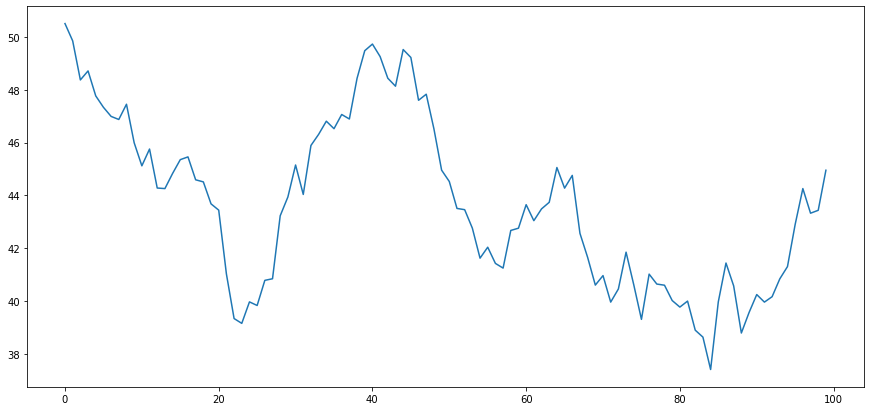

In [24]:
# Generate the daily returns
Xreturns = np.random.normal(0, 1, 100) 
# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 50
X.plot(figsize=(15,7))
plt.show()

Now we generate Y. Y is supposed to have a deep economic link to X, so the price of Y should vary pretty similarly. We model this by taking X, shifting it up and adding some random noise drawn from a normal distribution.

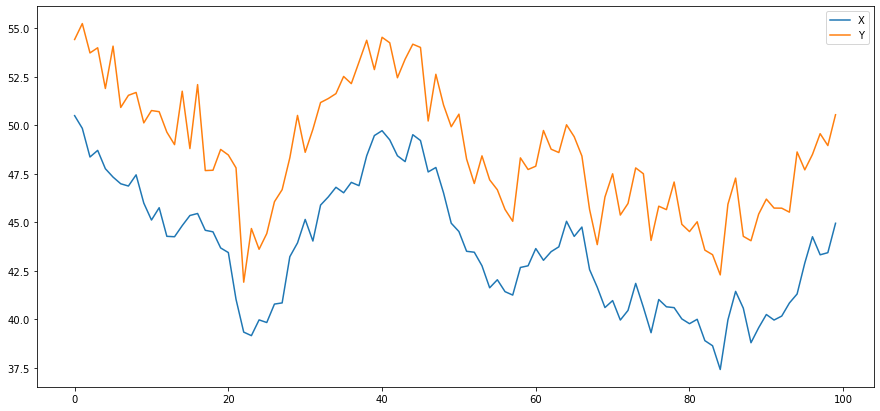

In [25]:
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.show()

### Cointegration
Cointegration, very loosely speaking, is a "different" form of correlation. If two series are cointegrated, the ratio between them will vary around a mean.
For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated.
The time series we constructued above are cointegrated. 

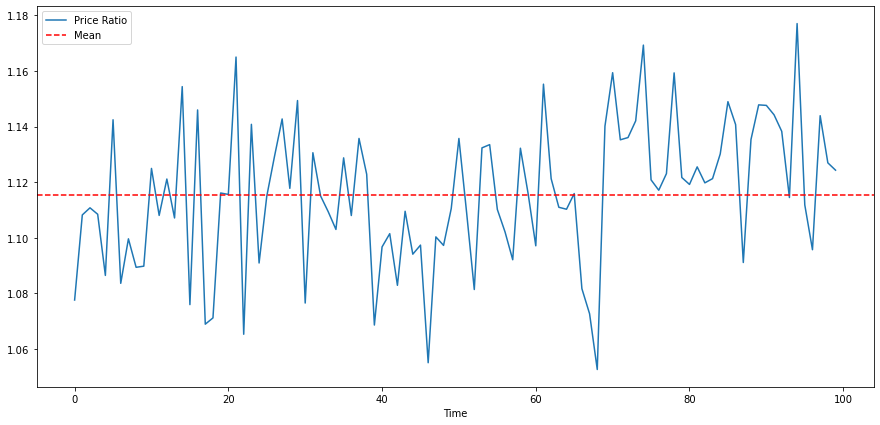

In [26]:
(Y/X).plot(figsize=(15,7)) 
plt.axhline((Y/X).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

### Testing for Cointegration
There is a convenient test that lives in statsmodels.tsa.stattools. We should see a very low p-value, as we've artificially created two series that are as cointegrated as physically possible.

In [27]:
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)



#### How to make a pairs trade?
Because two cointegrated time series (such as $X$ and $Y$ above) drift towards and apart from each other, there will be times when the spread is high and times when the spread is low. We make a pairs trade by buying one security and selling another. This way, if both securities go down together or go up together, we neither make nor lose money — we are market neutral.

Going back to $X$ and $Y$ above that follow $Y =  \alpha X + e$, such that ratio $(Y/X)$ moves around it’s mean value $\alpha$, we make money on the ratio of the two reverting to the mean. In order to do this we’ll watch for when $X$ and $Y$ are far apart, i.e $\alpha$ is too high or too low:

* Going Long the Ratio This is when the ratio $\alpha$ is smaller than usual and we expect it to increase. In the above example, we place a bet on this by buying Y and selling $X$.
* Going Short the Ratio This is when the ratio $\alpha$ is large and we expect it to become smaller. In the above example, we place a bet on this by selling $Y$ and buying $X$.

<b>Note </b> that we always have a “hedged position”: a short position makes money if the security sold loses value, and a long position will make money if a security gains value, so we’re immune to overall market movement. We only make or lose money if securities $X$ and $Y$ move relative to each other.

#### Using Data to find securities that behave like this
The best way to do this is to start with securities you suspect may be cointegrated and perform a statistical test. If you just run statistical tests over all pairs, you’ll fall prey to multiple comparison bias.

<b>Multiple comparisons bias </b> is simply the fact that there is an increased chance to incorrectly generate a significant p-value when many tests are run, because we are running a lot of tests. If 100 tests are run on random data, we should expect to see 5 $p$-values below 0.05. If you are comparing n securities for co-integration, you will perform $n(n-1)/2$ comparisons, and you should expect to see many incorrectly significant p-values, which will increase as you increase. To avoid this, pick a small number of pairs you have reason to suspect might be cointegrated and test each individually. This will result in less exposure to multiple comparisons bias.

So let’s try to find some securities that display cointegration. Let’s work with a basket of US large cap tech stocks — in S&P 500. These stocks operate in a similar segment and could have cointegrated prices. We scan through a list of securities and test for cointegration between all pairs. It returns a cointegration test score matrix, a p-value matrix, and any pairs for which the p-value was less than 0.05. This method is prone to multiple comparison bias and in practice the securities should be subject to a second verification step. Let’s ignore this for the sake of this example.

Note: We include the market benchmark (SPY) in our data — the market drives the movement of so many securities that often you might find two seemingly cointegrated securities; but in reality they are not cointegrated with each other but both cointegrated with the market. This is known as a confounding variable and it is important to check for market involvement in any relationship you find.


In [28]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [29]:
startDateStr = '2007/12/01'
endDateStr = '2017/12/01'
cachedFolderName = 'Data/'
dataSetId = 'testPairsTrading'
instrumentIds = ['SPY','AAPL','ADBE','EBAY','MSFT','QCOM',
                 'HPQ','JNPR','AMD','IBM']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']

Processing data for stock: SPY
Processing data for stock: AAPL
Processing data for stock: ADBE
Processing data for stock: EBAY
Processing data for stock: MSFT
Processing data for stock: QCOM
Processing data for stock: HPQ
Processing data for stock: JNPR
Processing data for stock: AMD
Processing data for stock: IBM
20% done...
40% done...
60% done...
80% done...


In [30]:
data.head(3)

,SPY,AAPL,ADBE,EBAY,MSFT,QCOM,HPQ,JNPR,AMD,IBM
2007-11-30,113.916695,5.623694,42.139999,13.747787,25.172091,29.466110,17.249519,25.925026,9.76,71.543716
2007-12-03,113.165680,5.519997,42.689999,13.509979,24.662655,28.873602,17.006760,26.492029,9.66,71.985878
2007-12-04,112.154205,5.549317,43.320000,13.501778,24.550285,28.440065,17.097797,26.526922,9.25,72.530060


Lets  run our method on the list and see if any pairs are cointegrated.

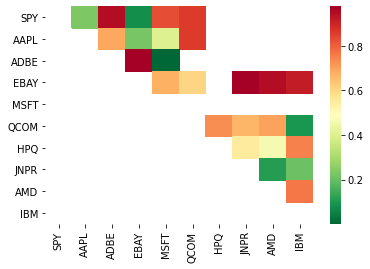

[('ADBE', 'MSFT')]


In [31]:
# Heatmap to show the p-values of the cointegration test
# between each pair of stocks

scores, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIds, 
                yticklabels=instrumentIds, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

Looks like 'ADBE' and 'MSFT' are cointegrated. Let's take a look at the prices to make sure there's nothing weird going on

0.0018311739610799662


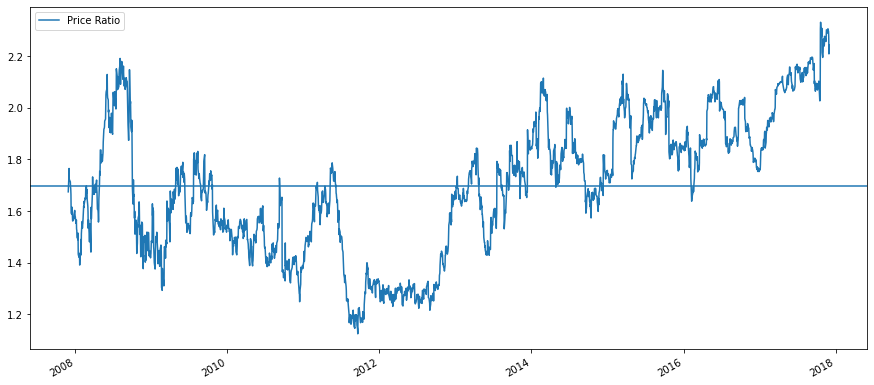

In [32]:
S1 = data['ADBE']
S2 = data['MSFT']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:


**Z-score** (a.k.a. *Standard score*) is the number of standard deviations ($\sigma$) by which the value ($x$) of a raw score (i.e., an observed value or data point) is above or below the mean value ($\mu$) of what is being observed or measured.


$$ 
z = \frac{x - \mu }{\sigma} \\
$$

$z$ = z-Score;
$x$ = value;
$\mu$ = mean;
$\sigma$ = standard deviation

<b>WARNING</b>
In practice this is usually done to try to give some scale to the data, but this assumes an underlying distribution. Usually normal. However, much financial data is not normally distributed, and we must be very careful not to simply assume normality, or any specific distribution when generating statistics. The true distribution of ratios could be very fat-tailed and prone to extreme values messing up our model and resulting in large losses.

In [33]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

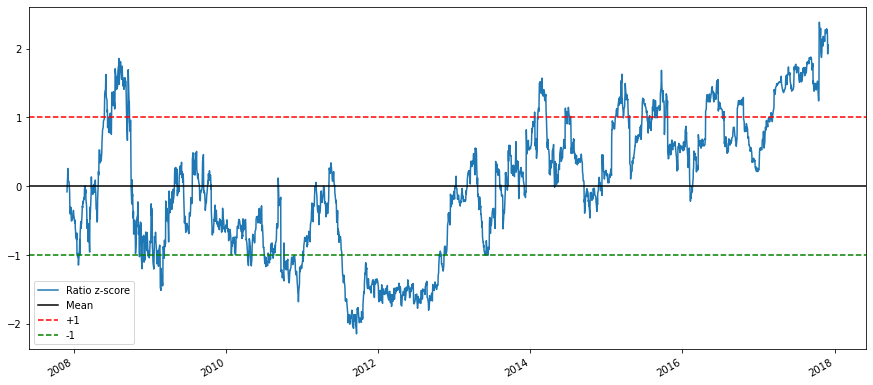

In [34]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

### Simple Strategy:
* Go "Long" the ratio whenever the z-score is below -1.0
* Go "Short" the ratio when the z-score is above 1.0
* Exit positions when the z-score approaches zero

This is just the tip of the iceberg, and only a very simplistic example to illustrate the concepts.
* In practice you would want to compute a more optimal weighting for how many shares to hold for S1 and S2
* You would also want to trade using constantly updating statistics. 

In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.

Instead of using ratio values, let's use 5d Moving Average to compute to z score, and the 60d Moving Average and 60d Standard Deviation as the mean and standard deviation.

First break the data into training set of 7 years and test set of 3 years

In [35]:
ratios = data['ADBE'] / data['MSFT']
print(len(ratios))
train = ratios[:1762]
test = ratios[1762:]

2519


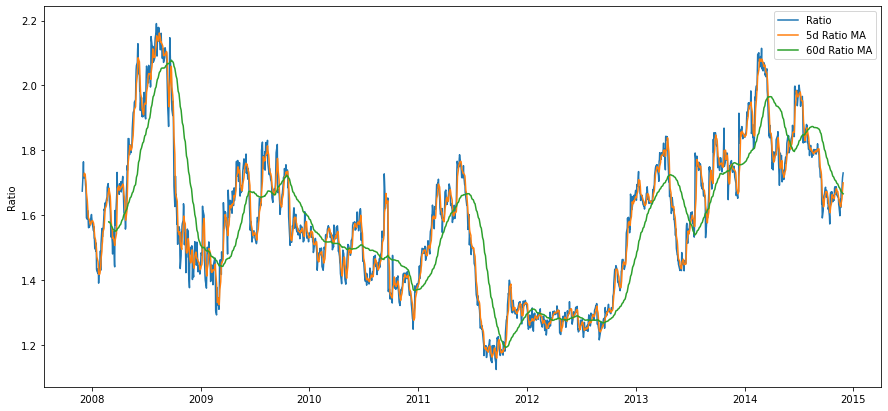

In [36]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()

std_60 = train.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

We can use the moving averages to compute the z-score of the ratio at each given time. This will tell us how extreme the ratio is and whether it's a good idea to enter a position at this time. Let's take a look at the z-score now.


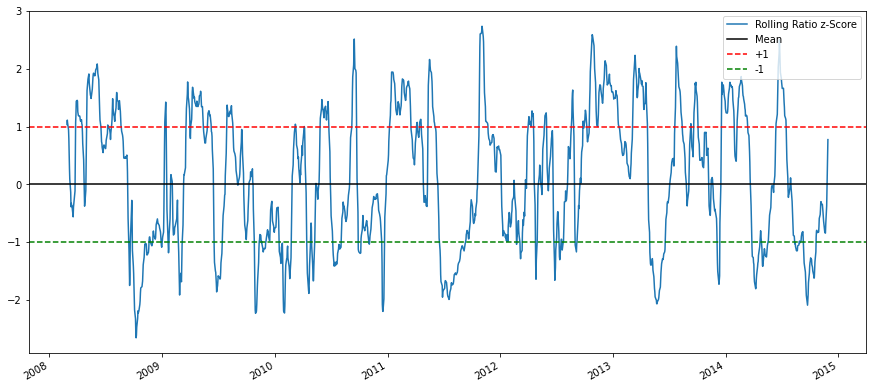

In [37]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

The z-score doesn't mean much out of context, let's plot it next to the prices to get an idea of what it looks like.


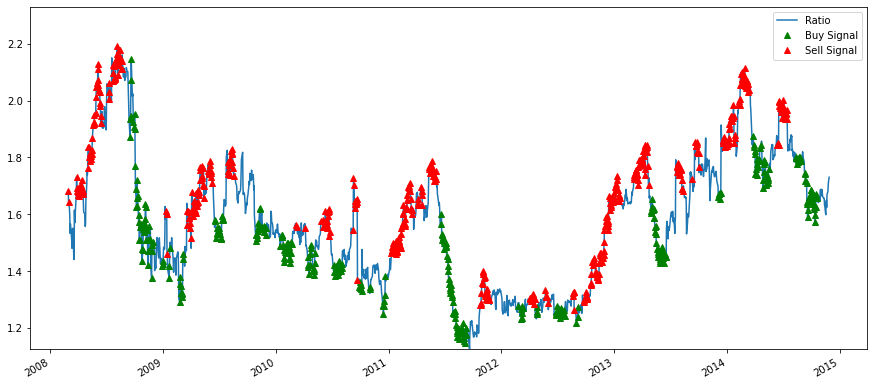

In [38]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

What does that mean for actual stocks that we are trading? Let’s take a look

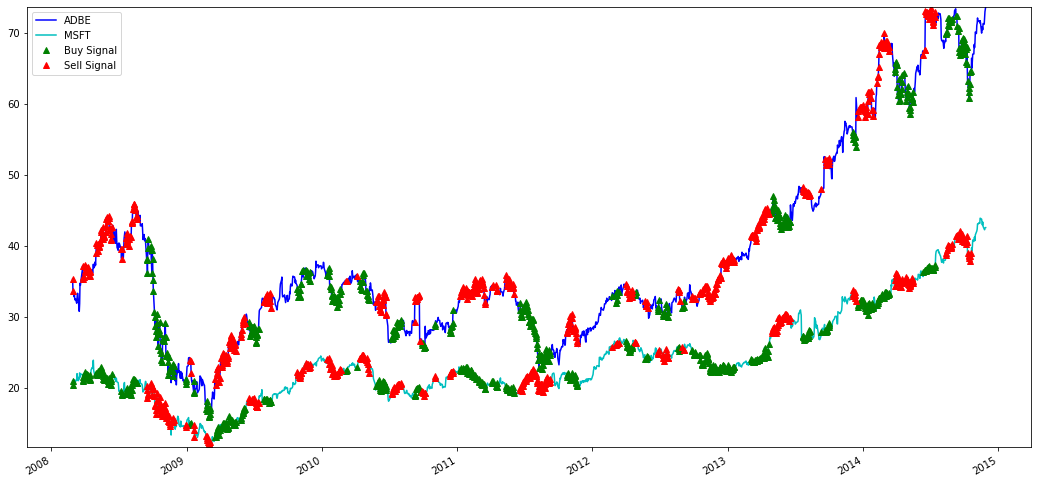

In [39]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data['ADBE'].iloc[:1762]
S2 = data['MSFT'].iloc[:1762]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))

plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()


Notice how we sometimes make money on the short leg and sometimes on the long leg, and sometimes both.

Let’s see what kind of profits this signal can generate. We write a simple backtester which buys 1 ratio (buy 1 ADBE stock and sell ratio x MSFT stock) when ratio is low, sell 1 ratio (sell 1 ADBE stock and buy ratio x MSFT stock) when it’s high and calculate PnL of these trades.

In [40]:
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money


trade(data['ADBE'].iloc[:1762], data['MSFT'].iloc[:1762], 5, 60)


631.8331078418325

The strategy seems profitable! Now we can optimize further by changing our moving average windows, by changing the thresholds for buy/sell and exit positions etc and check for performance improvements on validation data.
We could also try more sophisticated models like Logistic Regression, SVM etc to make our 1/-1 predictions.

Let's see how it does on test data

In [41]:
trade(data['ADBE'].iloc[1762:], data['MSFT'].iloc[1762:], 5, 90)

1180.9662309616338

#### Profits again!

#### Avoid Overfitting

Overfitting is the most dangerous pitfall of a trading strategy. In our model, we used rolling parameter estimates and may wish to optimize window length. We can simply iterate over all possible, reasonable window lengths and pick the length based on which our model performs the best . Below we write a simple loop to score window lengths based on pnl of training data and find the best one.

In [42]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(data['ADBE'].iloc[:1762], 
                data['MSFT'].iloc[:1762], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 246


Now we check the performance of our model on test data and we find that this window length is far from optimal! This is because our original choice was clearly overfitted to the sample data.

In [43]:
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(data['ADBE'].iloc[1762:], 
                  data['MSFT'].iloc[1762:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

246 day window: 987.0064119587017
191 day window: 1572.1953038267602


We can see this if we also plot Pnl by window length separately for traning and test data

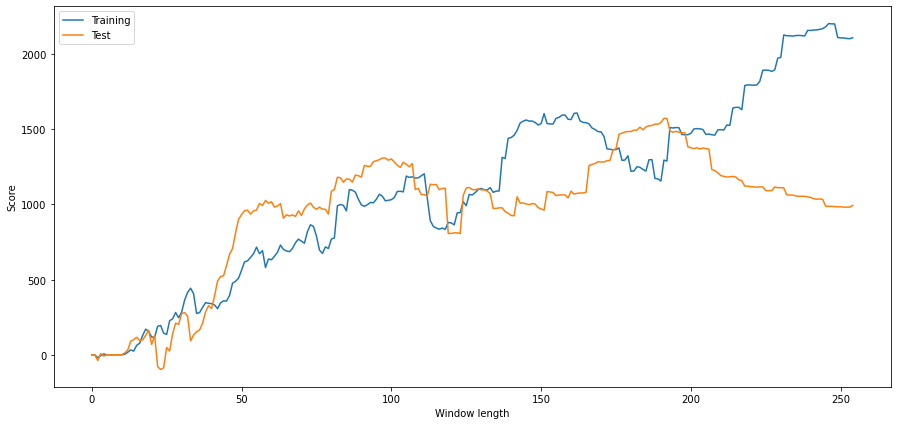

In [44]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

### Hedging
Because you'd like to protect yourself from bad markets, often times short sales will be used to hedge long investments. Because a short sale makes money if the security sold loses value, and a long purchase will make money if a security gains value, one can long parts of the market and short others. That way if the entire market falls off a cliff, we'll still make money on the shorted securities and hopefully break even. In the case of two securities we'll call it a hedged position when we are long on one security and short on the other.

#### The Trick: Where it all comes together
Because the securities drift towards and apart from each other, there will be times when the distance is high and times when the distance is low. The trick of pairs trading comes from maintaining a hedged position across X and Y. If both securities go down, we neither make nor lose money, and likewise if both go up. We make money on the spread of the two reverting to the mean. In order to do this we'll watch for when X and Y are far apart, then short Y and long X. Similarly we'll watch for when they're close together, and long Y and short X.

#### Going Long the Spread
This is when the spread is small and we expect it to become larger. We place a bet on this by longing Y and shorting X.

#### Going Short the Spread
This is when the spread is large and we expect it to become smaller. We place a bet on this by shorting Y and longing X.

#### Specific Bets
One important concept here is that we are placing a bet on one specific thing, and trying to reduce our bet's dependency on other factors such as the market.

#### Finding real securities that behave like this
The best way to do this is to start with securities you suspect may be cointegrated and perform a statistical test. If you just run statistical tests over all pairs, you'll fall prey to multiple comparison bias.

---
---

## D. Long-Short Equity  <a id="20"></a>

Long-short equity refers to the fact that the strategy is both long and short in the equity market. This is a rather general statement, but has over time grown to mean a specific family of strategies. These strategies rank all stocks in the market using some model. The strategy then goes long (buys) the top $n$ equities of the ranking, and goes short on (sells) the bottom $n$ while maintaining equal dollar volume between the long and short positions. This has the advantage of being statistically robust, as by ranking stocks and entering hundreds or thousands of positions, you are making many bets on your ranking model rather than just a few risky bets. You are also betting purely on the quality of your ranking scheme, as the equal dollar volume long and short positions ensure that the strategy will remain market neutral (immune to market movements).

### Ranking Scheme

A ranking scheme is any model that can assign each stocks a number, where higher is better or worse. Examples could be value factors, technical indicators, pricing models, or a combination of all of the above. The Ranking Universes by Factors lecture will cover ranking schemes in more detail. Ranking schemes are the secret sauce of any long-short equity strategy, so developing them is nontrivial.

### Making a Bet on the Ranking Scheme

Once we have determined a ranking scheme, we would like to be able to profit from it. We do this by investing an equal amount of money long into the top of the ranking, and short into the bottom. This ensures that the strategy will make money proportionally to the quality of the ranking only, and will be market neutral.

### Long and Short Baskets

If you are ranking $m$ equities, have $d$ dollars to invest, and your total target number of positions to hold is $2n$, then the long and short baskets are created as follows. For each equity in spots $1, \dots, n$ in the ranking, sell $\frac{1}{2n} * d$ dollars of that equity. For each equity in spots $m - n, \dots, m$ in the ranking, buy $\frac{1}{2n} * d$ dollars of that equity. 

#### Friction Because of Prices

Because equity prices will not always divide $\frac{1}{2n} * d$ evenly, and equities must be bought in integer amounts, there will be some imprecision and the algorithm should get as close as it can to this number. Most algorithms will have access to some leverage during execution, so it is fine to buy slightly more than $\frac{1}{2n} * d$ dollars per equity. This does, however, cause some friction at low capital amounts. For a strategy running $d = 100000$, and $n = 500$, we see that 
$$\frac{1}{2n} * d = \frac{1}{1000} * 100000 = 100$$
This will cause big problems for expensive equities, and cause the algorithm to be overlevered. This is alleviated by trading fewer equities or increasing the capital, $d$. Luckily, long-short equity strategies tend to be very high capicity, so there is for most purposes no ceiling on the amount of money one can invest. For more information on algorithm capacities, refer to the algorithm capacity lecture when it is released.

### Returns Come From The Ranking Spread

The returns of a long-short equity strategy are dependent on how well the ranking spreads out the high and low returns. To see how this works, consider this hypothetical example.

In [45]:
# We'll generate a random factor
current_factor_values = np.random.normal(0, 1, 10000)
equity_names = ['Equity ' + str(x) for x in range(10000)]
# Put it into a dataframe
factor_data = pd.Series(current_factor_values, index = equity_names)
factor_data = pd.DataFrame(factor_data, columns=['Factor Value'])
# Take a look at the dataframe
factor_data.head(10)

,Factor Value
Equity 0,-0.908459
Equity 1,-1.235150
Equity 2,-0.021400
Equity 3,-0.666412
Equity 4,-1.448506
Equity 5,-0.566994
Equity 6,0.389427
Equity 7,-0.326493
Equity 8,0.445465
Equity 9,0.012738


In [46]:
# Now let's say our future returns are dependent on our factor values
future_returns = current_factor_values + np.random.normal(0, 1, 10000)

returns_data = pd.Series(future_returns, index=equity_names)
returns_data = pd.DataFrame(returns_data, columns=['Returns'])
# Put both the factor values and returns into one dataframe
data = returns_data.join(factor_data)
# Take a look
data.head(10)

,Returns,Factor Value
Equity 0,-1.830997,-0.908459
Equity 1,-1.440170,-1.235150
Equity 2,-0.369591,-0.021400
Equity 3,-1.963059,-0.666412
Equity 4,-1.808076,-1.448506
Equity 5,-0.542009,-0.566994
Equity 6,0.485134,0.389427
Equity 7,-1.664834,-0.326493
Equity 8,-0.696655,0.445465
Equity 9,-0.800922,0.012738


Now that we have factor values and returns, we can see what would happen if we ranked our equities based on factor values, and then entered the long and short positions.

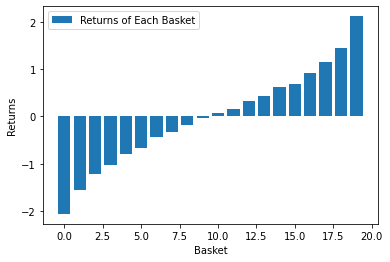

In [52]:
# Rank the equities
ranked_data = data.sort_values('Factor Value')

# Compute the returns of each basket
# Baskets of size 500, so we create an empty array of shape (10000/500)
number_of_baskets = (10000//500)
basket_returns = np.zeros(number_of_baskets)

for i in range(number_of_baskets):
    start = i * 500
    end = i * 500 + 500 
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()

# Plot the returns of each basket
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);

Let's compute the returns if we go long the top basket and short the bottom basket.

In [53]:
basket_returns[number_of_baskets-1] - basket_returns[0]

4.182457606506707

#### Market Neutrality is Built-In

The nice thing about making money based on the spread of the ranking is that it is unaffected by what the market does.

In [56]:
# We'll generate a random factor
current_factor_values = np.random.normal(0, 1, 10000)
equity_names = ['Equity ' + str(x) for x in range(10000)]
# Put it into a dataframe
factor_data = pd.Series(current_factor_values, index = equity_names)
factor_data = pd.DataFrame(factor_data, columns=['Factor Value'])

# Now let's say our future returns are dependent on our factor values
future_returns = -10 + current_factor_values + np.random.normal(0, 1, 10000)

returns_data = pd.Series(future_returns, index=equity_names)
returns_data = pd.DataFrame(returns_data, columns=['Returns'])
# Put both the factor values and returns into one dataframe
data = returns_data.join(factor_data)

# Rank the equities
ranked_data = data.sort_values('Factor Value')

# Compute the returns of each basket
# Baskets of size 500, so we create an empty array of shape (10000/500
number_of_baskets = 10000//500
basket_returns = np.zeros(number_of_baskets)

for i in range(number_of_baskets):
    start = i * 500
    end = i * 500 + 500 
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()

basket_returns[number_of_baskets-1] - basket_returns[0]

4.139956649467642

#### Choice and Evaluation of a Ranking Scheme

The ranking scheme is where a long-short equity strategy gets its edge, and is the most crucial component. Choosing a good ranking scheme is the entire trick, and there is no easy answer. A good starting point is to pick existing known techniques, and see if you can modify them slightly to get increased returns. More information on ranking scheme construction can be found in the notebooks listed below.

During research of your ranking scheme, it's important to determine whether or not your ranking scheme is actually predictive of future returns. This can be accomplished with spearman rank correlation

### Long-Short is a Modular Strategy

To execute a long-short equity, you effectively only have to determine the ranking scheme. Everything after that is mechanical. Once you have one long-short equity strategy, you can swap in different ranking schemes and leave everything else in place. It's a very convenient way to quickly iterate over ideas you have without having to worry about tweaking code every time.

The ranking schemes can come from pretty much any model as well. It doesn't have to be a value based factor model, it could be a machine learning technique that predicted returns one-month ahead and ranked based on that.

We will be releasing sample long-short algorithms to go along with this notebook. Please stay tuned for those.

#### Additional Considerations

#####  Rebalancing Frequency

Every ranking system will be predictive of returns over a slightly different timeframe. A price-based mean reversion may be predictive over a few days, while a value-based factor model may be predictive over many months. It is important to determine the timeframe over which your model should be predictive, and statistically verify that before executing your strategy. You do want to overfit by trying to optimize the relabancing frequency, you will inevitably find one that is randomly better than others, but not necessary because of anything in your model.

Once you have determined the timeframe on which your ranking scheme is predictive, try to rebalance at about that frequency so you're taking full advantage of your models.


##### Capital Capacity

Every strategy has a minimum and maximum amount of capital it can trade before it stops being profitable. We will be releasing a full notebook discussing these concepts, but in the meantime consider the following.

#### Number of Equities Traded

##### Transaction Costs

Trading many equities will result in high transaction costs. Say that you want to purchase $1000$ equities, you will incur thousands of dollars of costs per rebalance. Your capital base must be high enough that the transaction costs are a small percentage of the returns being generated by your strategy. Say that you are running $100,000$ dollars and making $1\%$ per month, then the $1000$ dollars of transaction fees per month would take up your all of returns. You would need to be running the strategy on millions of dollars for it to be profitable over $1000$ equities.

The minimum capacity is quite high as such, and dependent largely on the number of equities traded. However, the maximum capacity is also incredibly high, with long-short equity strategies capable of trading hundreds of millions of dollars without losing their edge. This is true because the strategy rebalances relatively infrequently, and the total dollar volume is divided by the number of equities traded. So if you turn over your entire portfolio of $100,000,000$ every month while running 1000 equities, you are only running $100,000$ dollar-volume per month through each equity, which isn't enough to be a significant market share for most securities.

# 2. Advanced Manipulation to gain an Edge <a id="4"></a>

## A. Hurst Exponents <a id="5"></a>

<a ><img src="https://upload.wikimedia.org/wikipedia/commons/a/af/Simple_Fractals.png"  width="500" align="Left"> </a>

In this section we'll implementing a strategy to trade on momentum. You'll be using the training wheels version of Auquan's toolbox to abstract out the details since the full version of toolbox is a bit comprehensive to get started with. 

We're providing you with a bare-bones version that shows you how to use 30 day momentum to trade on Apple, sometime between 2015 and 2020. This naive strategy loses money and that's to be expected. Your goal is to make use of Hurst exponent that you learnt in previous lessons to create a better strategy. 

This is an analytical method of momentum trading, but it is also to turn this into a machine learning problem.

**Goals**:
1. Understand how the barebones momentum version is working and make yourself comfortable with it
2. Use the Hurst exponent to create a money making strategy

The Hurst exponent is used as a measure of long-term memory of time series. It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases. 


The Hurst exponent, $H$, is defined in terms of the asymptotic behaviour of the rescaled range as a function of the time span of a time series as follows:

$$
 \mathbb {E} \left[{\frac {R(n)}{S(n)}}\right]=Cn^{H}{\text{ as }}n\to \infty \,
$$

where,

- $R(n)$ is the range of the first $n$ cumulative deviations from the mean, and $S(n)$ is their standard deviation
- $ \mathbb {E} \left[x\right]\  $is the expected value
- $n$ is the time span of the observation (number of data points in a time series)
- $C$ is a constant.


Let's import everything we need to run our backtesting algorithm

In [60]:
#!pip install qq-training-wheels auquan_toolbox --upgrade

In [62]:
from qq_training_wheels.momentum_trading import MomentumTradingParams
from backtester.trading_system import TradingSystem
from backtester.features.feature import Feature

The class below implements all the logic you need to run the momentum backtester. Go through it and make sure you understand each part. You can run it first and make changes later to see if you made any improvements over the naive strategy.

There are 6 functions within the class:

- \_\_init\_\_
- getSymbolsToTrade
- getInstrumentFeatureConfigDicts
- getPredictions
- hurst_f
- updateCount

**__init__**

Initializes the class

**getSymbolsToTrade**

This is where we can select which stocks we want to test our strategy on. Here we're using just AAPL is it is the only ticker returned

**getInstrumentConfigDicts** 

This is the way that the toolbox creates features that we want to use in our logic. It's really important for resource optimisation at scale but can look a little daunting at first. We've created the features you'll need for you. If you're interested in learning more you can here: https://blog.quant-quest.com/toolbox-breakdown-getfeatureconfigdicts-function/

**getPrediction**

This again is fairly straight forward. We've included a few notes here, but for more detail: https://blog.quant-quest.com/toolbox-breakdown-getprediction-function/

Once you've calculated the hurst exponent, this should contain the logic to use it and make profitable trades.

**hurst_f**

This is your time to shine! This is where you will need to implement the hurst exponent as shown in the previous lecture. There are several different ways of calculating the hurst exponent, so we recommend you use the method shown in the lecture to allow other people to easily help you - if needed!

**updateCount**
A counter

In [63]:
class MyTradingFunctions():

    def __init__(self):
        self.count = 0
        # When to start trading
        self.start_date = '2015/01/02'
        # When to end trading
        self.end_date = '2017/08/31'
        self.params = {}

    def getSymbolsToTrade(self):
        '''
        Specify the stock names that you want to trade.
        '''
        return ['AAPL']

    def getInstrumentFeatureConfigDicts(self):
        '''
        Specify all Features you want to use by creating config dictionaries.
        Create one dictionary per feature and return them in an array.

        Feature config Dictionary have the following keys:

        featureId: a str for the type of feature you want to use
        featureKey: {optional} a str for the key you will use to call this feature
                    If not present, will just use featureId
        params: {optional} A dictionary with which contains other optional params if needed by the feature

        msDict = {
            'featureKey': 'ms_5',
            'featureId': 'moving_sum',
            'params': {
                'period': 5,
                'featureName': 'basis'
            }
        }

        return [msDict]

        You can now use this feature by in getPRediction() calling it's featureKey, 'ms_5'
        '''

        ma1Dict = {
            'featureKey': 'ma_90',
            'featureId': 'moving_average',
            'params': {
                'period': 90,
                'featureName': 'adjClose'
            }
        }
        mom30Dict = {
            'featureKey': 'mom_30',
            'featureId': 'momentum',
            'params': {
                'period': 30,
                'featureName': 'adjClose'
            }
        }
        mom10Dict = {
            'featureKey': 'mom_10',
            'featureId': 'momentum',
            'params': {
                'period': 10,
                'featureName': 'adjClose'
            }
        }
        
        return [ma1Dict, mom10Dict, mom30Dict]

    def getPrediction(self, time, updateNum, instrumentManager, predictions):
        '''
        Combine all the features to create the desired predictions for each stock.
        'predictions' is Pandas Series with stock as index and predictions as values
        We first call the holder for all the instrument features for all stocks as
            lookbackInstrumentFeatures = instrumentManager.getLookbackInstrumentFeatures()
        Then call the dataframe for a feature using its feature_key as
            ms5Data = lookbackInstrumentFeatures.getFeatureDf('ms_5')
        This returns a dataFrame for that feature for ALL stocks for all times upto lookback time
        Now you can call just the last data point for ALL stocks as
            ms5 = ms5Data.iloc[-1]
        You can call last datapoint for one stock 'ABC' as
            value_for_abs = ms5['ABC']

        Output of the prediction function is used by the toolbox to make further trading decisions and evaluate your score.
        '''

        self.updateCount() # uncomment if you want a counter

        # holder for all the instrument features for all instruments
        lookbackInstrumentFeatures = instrumentManager.getLookbackInstrumentFeatures()
        
        def hurst_f(input_ts, lags_to_test=20):  
            # interpretation of return value
            # hurst < 0.5 - input_ts is mean reverting
            # hurst = 0.5 - input_ts is effectively random/geometric brownian motion
            # hurst > 0.5 - input_ts is trending
            tau = []
            lagvec = []  
            #  Step through the different lags  
            for lag in range(2, lags_to_test):  
                #  produce price difference with lag  
                pp = np.subtract(input_ts[lag:].values, input_ts[:-lag].values)  
                #  Write the different lags into a vector  
                lagvec.append(lag)  
                #  Calculate the variance of the differnce vector  
                tau.append(np.sqrt(np.std(pp)))  
            #  linear fit to double-log graph (gives power)  
            m = np.polyfit(np.log10(lagvec), np.log10(tau), 1)  
            # calculate hurst  
            hurst = m[0]*2
            print(hurst)
            return hurst  

        # dataframe for a historical instrument feature (ma_90 in this case). The index is the timestamps
        # of upto lookback data points. The columns of this dataframe are the stock symbols/instrumentIds.
        mom10Data = lookbackInstrumentFeatures.getFeatureDf('mom_10')
        mom30Data = lookbackInstrumentFeatures.getFeatureDf('mom_30')
        ma90Data = lookbackInstrumentFeatures.getFeatureDf('ma_90')
        
        # Here we are making predictions on the basis of Hurst exponent if enough data is available, otherwise
        # we simply get out of our position
        if len(ma90Data.index)>20:
            mom30 = mom30Data.iloc[-1]
            mom10 = mom10Data.iloc[-1]
            ma90 = ma90Data.iloc[-1]
            
            # Calculate Hurst Exponent
            hurst = ma90Data.apply(hurst_f, axis=0)
            # Go long if Hurst > 0.5 and both long term and short term momentum are positive
            predictions[(hurst > 0.5) & (mom30 > 0) & (mom10 > 0)] = 1 
            # Go short if Hurst > 0.5 and both long term and short term momentum are negative
            predictions[(hurst > 0.5) & (mom30 <= 0) & (mom10 <= 0)] = 0 
            
            # Get out of position if Hurst > 0.5 and long term momentum is positive while short term is negative
            predictions[(hurst > 0.5) & (mom30 > 0) & (mom10 <= 0)] = 0.5
            # Get out of position if Hurst > 0.5 and long term momentum is negative while short term is positive
            predictions[(hurst > 0.5) & (mom30 <= 0) & (mom10 > 0)] = 0.5
            
            # Get out of position if Hurst < 0.5
            predictions[hurst <= 0.5] = 0.5        
        else:
            # If no sufficient data then don't take any positions
            predictions.values[:] = 0.5
        return predictions

    def updateCount(self):
        self.count = self.count + 1

#### Initialize everything we've created so far

In [64]:
tf = MyTradingFunctions()
tsParams = MomentumTradingParams(tf)
tradingSystem = TradingSystem(tsParams)

Processing data for stock: AAPL
20% done...
40% done...
60% done...
80% done...
Logging all the available market metrics in tensorboard
Logging all the available instrument metrics in tensorboard


#### Start Trading ...
You'll see your pnl as the backtesting runs. If you want more detailed results, two folders: `runLogs` and `tb_logs` are generated in the same directory as this script. You'll find the csv's for results inside `runLogs` and tensorboard log inside `tb_logs` 

In [65]:
results = tradingSystem.startTrading()

2015-01-02 00:00:00
2015-01-05 00:00:00
AAPL
pnl: 0.00
2015-01-06 00:00:00
AAPL
pnl: 0.00
2015-01-07 00:00:00
AAPL
pnl: 0.00
2015-01-08 00:00:00
AAPL
pnl: 0.00
2015-01-09 00:00:00
AAPL
pnl: 0.00
2015-01-12 00:00:00
AAPL
pnl: 0.00
2015-01-13 00:00:00
AAPL
pnl: 0.00
2015-01-14 00:00:00
AAPL
pnl: 0.00
2015-01-15 00:00:00
AAPL
pnl: 0.00
2015-01-16 00:00:00
AAPL
pnl: 0.00
2015-01-19 00:00:00
AAPL
pnl: 0.00
2015-01-20 00:00:00
AAPL
pnl: 0.00
2015-01-21 00:00:00
AAPL
pnl: 0.00
2015-01-22 00:00:00
AAPL
pnl: 0.00
2015-01-23 00:00:00
AAPL
pnl: 0.00
2015-01-26 00:00:00
AAPL
pnl: 0.00
2015-01-27 00:00:00
AAPL
pnl: 0.00
2015-01-28 00:00:00
AAPL
pnl: 0.00
2015-01-29 00:00:00
AAPL
pnl: 0.00
2015-01-30 00:00:00
0.09157838339460653
AAPL
pnl: 0.00
2015-02-02 00:00:00
0.09615748482473056
AAPL
pnl: 0.00
2015-02-03 00:00:00
0.08435360062804417
AAPL
pnl: 0.00
2015-02-04 00:00:00
0.07706755581365263
AAPL
pnl: 0.00
2015-02-05 00:00:00
0.08728165404893559
AAPL
pnl: 0.00
2015-02-06 00:00:00
0.11144063004617262


0.839117043220123
AAPL
pnl: -5.38
2015-07-24 00:00:00
0.8285879376476526
AAPL
pnl: -5.40
Position changed to: 0.00
2015-07-27 00:00:00
0.8206124297863652
AAPL
pnl: -5.40
2015-07-28 00:00:00
0.8155126032809161
AAPL
pnl: -5.40
Position changed to: -1.00
2015-07-29 00:00:00
0.8125916780780477
AAPL
pnl: -5.54
2015-07-30 00:00:00
0.8110546066861885
AAPL
pnl: -5.45
2015-07-31 00:00:00
0.8112275142147444
AAPL
pnl: -5.30
2015-08-03 00:00:00
0.8132940405716291
AAPL
pnl: -5.06
2015-08-04 00:00:00
0.8165438835129617
AAPL
pnl: -4.40
2015-08-05 00:00:00
0.8222789124198544
AAPL
pnl: -3.53
2015-08-06 00:00:00
0.8327751334557352
AAPL
pnl: -3.70
2015-08-07 00:00:00
0.8458561983646576
AAPL
pnl: -3.76
2015-08-10 00:00:00
0.8560074555007204
AAPL
pnl: -3.85
2015-08-11 00:00:00
0.8636472602527805
AAPL
pnl: -4.82
2015-08-12 00:00:00
0.8712409479003178
AAPL
pnl: -3.38
2015-08-13 00:00:00
0.8779231255596508
AAPL
pnl: -3.78
2015-08-14 00:00:00
0.8848985395607661
AAPL
pnl: -3.76
2015-08-17 00:00:00
0.89150850987

2016-02-01 00:00:00
0.8838130407467268
AAPL
pnl: 1.02
2016-02-02 00:00:00
0.8821456981031023
AAPL
pnl: 1.23
Position changed to: 0.00
2016-02-03 00:00:00
0.8827552697835707
AAPL
pnl: 1.23
Position changed to: -1.00
2016-02-04 00:00:00
0.8869816443863859
AAPL
pnl: 0.80
2016-02-05 00:00:00
0.8928144609507692
AAPL
pnl: 0.62
Position changed to: 0.00
2016-02-08 00:00:00
0.8967515784271208
AAPL
pnl: 0.62
Position changed to: -1.00
2016-02-09 00:00:00
0.8993547993158
AAPL
pnl: 0.39
2016-02-10 00:00:00
0.9019182394737326
AAPL
pnl: 0.39
2016-02-11 00:00:00
0.905381911050444
AAPL
pnl: 0.56
Position changed to: 0.00
2016-02-12 00:00:00
0.9095337380550593
AAPL
pnl: 0.56
2016-02-15 00:00:00
0.9121715840668781
AAPL
pnl: 0.56
Position changed to: -1.00
2016-02-16 00:00:00
0.9136251710845578
AAPL
pnl: 0.56
2016-02-17 00:00:00
0.9160346956850988
AAPL
pnl: -0.06
Position changed to: 0.00
2016-02-18 00:00:00
0.9188673031864855
AAPL
pnl: -0.06
2016-02-19 00:00:00
0.9198802484842915
AAPL
pnl: -0.06
Positi

2016-08-18 00:00:00
0.8279072871005081
AAPL
pnl: 4.34
2016-08-19 00:00:00
0.8340120350025884
AAPL
pnl: 4.31
2016-08-22 00:00:00
0.842678183734118
AAPL
pnl: 4.37
2016-08-23 00:00:00
0.8508936108299062
AAPL
pnl: 4.17
2016-08-24 00:00:00
0.8580703779382123
AAPL
pnl: 4.25
Position changed to: 0.00
2016-08-25 00:00:00
0.8628183511500221
AAPL
pnl: 4.25
Position changed to: 1.00
2016-08-26 00:00:00
0.8630179874144627
AAPL
pnl: 4.14
2016-08-29 00:00:00
0.8593412551380073
AAPL
pnl: 4.00
Position changed to: 0.00
2016-08-30 00:00:00
0.8547614510714278
AAPL
pnl: 4.00
2016-08-31 00:00:00
0.8468288042460639
AAPL
pnl: 4.00
2016-09-01 00:00:00
0.8330110738079038
AAPL
pnl: 4.00
2016-09-02 00:00:00
0.8150732699199237
AAPL
pnl: 4.00
2016-09-05 00:00:00
0.7972827048235942
AAPL
pnl: 4.00
2016-09-06 00:00:00
0.7852524180201882
AAPL
pnl: 4.00
2016-09-07 00:00:00
0.7773274477557824
AAPL
pnl: 4.00
2016-09-08 00:00:00
0.7738801604635684
AAPL
pnl: 4.00
2016-09-09 00:00:00
0.7754718932862152
AAPL
pnl: 4.00
Posit

2017-03-03 00:00:00
0.8866020319068153
AAPL
pnl: 8.17
2017-03-06 00:00:00
0.8841991431415821
AAPL
pnl: 8.37
2017-03-07 00:00:00
0.8802459440884142
AAPL
pnl: 8.26
2017-03-08 00:00:00
0.8756374784752713
AAPL
pnl: 8.31
2017-03-09 00:00:00
0.8709913945976357
AAPL
pnl: 8.18
2017-03-10 00:00:00
0.8663877274601692
AAPL
pnl: 8.11
2017-03-13 00:00:00
0.8634828366983981
AAPL
pnl: 8.22
2017-03-14 00:00:00
0.863373968842432
AAPL
pnl: 8.23
2017-03-15 00:00:00
0.8646945351564179
AAPL
pnl: 8.18
2017-03-16 00:00:00
0.864936123918382
AAPL
pnl: 8.53
Position changed to: 0.00
2017-03-17 00:00:00
0.8651485945208713
AAPL
pnl: 8.53
Position changed to: 1.00
2017-03-20 00:00:00
0.8642562791659143
AAPL
pnl: 8.36
2017-03-21 00:00:00
0.8640750768140972
AAPL
pnl: 8.71
2017-03-22 00:00:00
0.8664732126261637
AAPL
pnl: 8.33
2017-03-23 00:00:00
0.8709461424934402
AAPL
pnl: 8.70
2017-03-24 00:00:00
0.8768648793380459
AAPL
pnl: 8.59
2017-03-27 00:00:00
0.8840762082281622
AAPL
pnl: 8.52
2017-03-28 00:00:00
0.8911613076

#### Further reading on Hurst Exponents

- [Hurst Exponent and Trading Signals Derived from Market Time Series](https://www.scitepress.org/papers/2018/66670/66670.pdf)
- [DIE BERECHNUNG DES HURST-EXPONENTEN](https://www.mql5.com/de/articles/2930)



--- 
---

## B. Ornstein-Uhlenbeck Model <a id="6"></a>

### Ornstein-Uhlenbeck Model for optimal-stopping

Let’s look at some more mundane problems that can be solved with the little help of optimal-stopping theory.

The first example is the best-choice problem. Imagine, you decide to marry, and to find your perfect other half you conduct an interview with 100 applicants. The decision about an applicant is made immediately. You can not marry candidates who you already rejected, and if you are not married after interviewing candidate 99 – you have to marry candidate 100. Of course, you can choose the first applicant and get a 1% chance of getting the best spouse. But there is a way to marry the absolute best candidate more than one-third of the time.


The rule is to reject $n/e$=100/2.718=37 potential spouses, and then choose the first applicant who is better than every applicant interviewed so far.

The various problems similar to the ‘secretary problem’ create so-called ‘search theory’, that has especially focused on a worker’s search for the highest-paying job or a consumer’s search for the best deal on wanted goods.

Optimal stopping is also encountered in house selling. For example, if you wish to sell a house. Each day you are offered $X_{n}$ for your house, and pay $k$ to continue advertising it. If you sell your house on day $n$, you will earn $y_{n}$, where $y_{n}=(X_{n}-nk)$. You maximize the amount you earn by choosing the best stopping rule.

The field of optimal stopping problems is broad and vast, it ranges from option pricing with the Black-Scholes model to choosing the best parking spot when going to buy groceries. But what if I tell you that there is a simple and elegant way to use it for the statistical arbitrage?

#### Mean-reversion


But before that, we need to start with something that will allow the statistical arbitrage in the first place – mean-reversion.

Mean-reversion is a financial term for the assumption that a stock’s price will tend to return to the average price over time. Some asset prices are naturally mean-reverted: commodities, foreign exchange rates, volatility indices, equities – all of those can be modeled with mean-reverting processes, alongside with interest rate and default risk.

However, there is a much more lucrative approach that also allows for greater freedom of choice for the investor – pairs-trading. Facilitated by many hedge-fund managers, creation of the mean-reverting portfolios gave the ability to both pick almost any asset you’d want to trade and simultaneously rely on rigid mathematical concepts in the decision-making process. The only requirement to be is that the pair chosen has to be correlated or co-moving. Technically speaking, a portfolio is created by longing an 𝛼 amount of one asset and shorting 𝛽 amount of a second asset.
<br>

$$
\begin{aligned}dX_t = \mu(\theta – X_t)dt + \sigma dB_t,\end{aligned}
$$
$$
\begin{aligned}\mu, \sigma > 0,\end{aligned}
$$
$$
\begin{aligned}\theta \in \mathbb{R},\end{aligned}
$$
$$
\begin{aligned}B\ -\text{a standard Brownian motion}\end{aligned}
$$


It is no surprise that such spreads are widely used for statistical arbitrage.

Looking deeper, one very important commonly faced problem still stands – how to determine when to open and close the position. Should an investor wait or close the position immediately? When is it the optimal time to enter the market? All these questions bring us to a brilliant idea: what if we could look at it as an optimal stopping problem? Can we create a procedure that will give us the means to predict the best time to enter or liquidate the position?

For an answer to this question, we turn to a book by Professor Tim Leung and Xin Li: “Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications“. We will showcase how the widely known Ornstein-Uhlenbeck process can be used to create your optimal mean-reverted portfolio and to also find the solution for the optimal timing of trades problem.

#### The work of Professor Tim Leung

Ornstein-Uhlenbeck model is established by the following SDE:

<br>

$$
\begin{aligned}dX_t = \mu(\theta – X_t)dt + \sigma dB_t,\end{aligned}
$$
$$
\begin{aligned}\mu, \sigma > 0,\end{aligned}
$$
$$
\begin{aligned}\theta \in \mathbb{R},\end{aligned}
$$
$$
\begin{aligned}B\ -\text{a standard Brownian motion}\end{aligned}
$$

**Where:**


- $\theta$ − long term mean level, all future trajectories of 𝑋 will evolve around a mean level 𝜃 in the long run.

- $\mu$ – the speed of reversion, characterizes the velocity at which such trajectories will regroup around 𝜃
in time.

- $\sigma$ – instantaneous volatility, measures instant by instant the amplitude of randomness entering the system. Higher values imply more randomness.

Note that we are using the same notation as used in the book, so the meaning behind $\theta$ and $\mu$ parameter may differ from other sources (Wikipedia, etc.).

To create an optimal portfolio using this model we can without the loss of generality presume that $\alpha = const$  while varying  $\beta$, since our main goal during this step can be simplified to finding an optimal ratio between the assets.


We observe the resulting portfolio values for every strategy $\beta$ realized over an $n$-day period. To fit the model to our data and find optimal parameters we define the average log-likelihood function. Our log-likelihood function is dependent on our $\beta$ coefficient and the $OU$ model’s parameters $\theta$, $\mu$ and $\sigma$.

Maximizing the log-likelihood function by applying maximum likelihood estimation (MLE) we can determine the parameters of the model and fit the observed portfolio prices to an $OU$ process. Let’s denote the maximized average log-likelihood by  $\hat{\ell}(\theta^*,\mu^*,\sigma^*)$. Then for every $\alpha$ , we choose $\beta *$, where:

<br>
$$
\begin{aligned} \beta^* = \underset{\beta}{\arg\max}\ \hat{\ell}(\theta^*,\mu^*,\sigma^*|x_0^{\alpha\beta},x_1^{\alpha\beta},\cdots,x_n^{\alpha\beta}) \end{aligned}
$$


To create the most fitting to an $OU$-model portfolio, hence optimal and more mean-reverted one.

The next step is to establish our optimal stopping problem: suppose the investor already has a position with a value process $(X_t),t>0$ that follows the OU process. When the investor closes his position at the time $\tau$ he receives the value  $(X_{\tau}),t>0$ and pays a constant transaction cost $c_s \in R$. To maximize the expected discounted value we need to solve the optimal stopping problem:


<br>
$$
\begin{aligned} V(x) = \underset{\tau \in T}{\sup} \mathbb{E}_x{e^{-r \tau} ((X_{\tau} – c_s)| X_0 = x)} \end{aligned}
$$

where $T$ denotes the set of all possible stopping times and $r>0$ is our subjective constant discount rate and $V(x)$ represents the expected liquidation value accounted with $X$.

The next logical step is to formalize the optimal entry problem since the future optimal value of liquidation minus current price and transaction cost constitute the cost of entering the trade:
<br>
$$
\begin{aligned} J(x) = \underset{\nu \in T}{\sup} \mathbb{E}_x{e^{-\hat{r} \tau} ((V(X_{\nu}) – X_{\nu} – c_b)| X_0 = x)} \end{aligned}
$$

Sometimes an investor would like to include a stop-loss level. If the price of a portfolio will ever reach this level, then the position will be closed immediately. So the problem is reformulated in the following way:


$$
\begin{aligned} V(x)_L = \underset{\tau \in T}{\sup} \mathbb{E}_x{e^{-r \tau \wedge \tau_L} ((X_{\tau \wedge \tau_L} – c_s)| X_0 = x)} \end{aligned}
$$

$$
\begin{aligned} J(x)_L = \underset{\nu \in T}{\sup} \mathbb{E}_x{e^{-\hat{r} \tau} ((V_L(X_{\nu}) – X_{\nu} – c_b)| X_0 = x)} \end{aligned}
$$

The analytical solutions for the optimal stopping problems are presented and proven in Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications by Professor Tim Leung and Xin Li.

Our goal is to find the single best entry/liquidation value pair to get the biggest amount of profit from one trade.

However similar both formulations may look, the results we get are slightly different.


In the default formulation as a result we are getting two values – optimal entry level $d*$ and optimal liquidation level $b*$. Since the obtained values are dependent on the $OU$ model parameters we can observe further correlations:


- With the increase of the long-term mean both entry and liquidation value tend to be higher.
- Faster mean reversion means closer buy and sell levels (where the sell-level value is going to decrease and the entry value – increase.
- The increase in volatility sets the buy and set levels further apart. So if the volatility is high it is possible to delay both entry and exit levels to seek a wider spread.
- High transaction costs also usually mean higher sell levels since we wish to compensate for the loss on transaction costs.

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="https://hudsonthames.org/wp-content/uploads/2020/09/optimal-levels.jpg" width="385">
    <br>
    <em style="color: grey">In the case of the problem with the addition of the stop-loss
</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="https://hudsonthames.org/wp-content/uploads/2020/09/optimal_entry_stop_loss.jpg" width="520">
    <br>
    <em style="color: grey">The optimal exit threshold vs stop-loss level. <br >
        The straight line lies where 𝑏𝐿=𝐿. <br >
        (Professor Tim Leung and Xin Li, 2015).
</em>
  </p> 
</td>
</tr></table>



<br >


- All correlations from the default model still hold true.
- The optimal liquidation level is strictly decreasing with the increase of the stop-loss level.
- The optimal entry-level becomes an optimal entry interval set strictly above the stop-loss level ($L$). The signal for buying, in this case, is when the price of a portfolio reaches one of the interval bounds. Particular case being if the current price is between the lower bound and a stop-loss level it is still optimal to wait to avoid exiting at a loss.
> “Our model can be considered as the building block for the problem with any finite number of sequential trades” – Professor Tim Leung and Xin Li, 2015.

--- 
---

## C. Kalman Filters <a id="7"></a>

In this section you will:

- Estimate Moving Average
- Use Kalman Filters to calculate the mean and covariance of our time series
- Modify a Pairs trading function to make use of Kalman Filters

### What is a Kalman Filter?

The Kalman filter is an algorithm that uses noisy observations of a system over time to estimate the parameters of the system (some of which are unobservable) and predict future observations. At each time step, it makes a prediction, takes in a measurement, and updates itself based on how the prediction and measurement compare.

The algorithm is as follows:
1. Take as input a mathematical model of the system, i.e.
  * the transition matrix, which tells us how the system evolves from one state to another. For instance, if we are modeling the movement of a car, then the next values of position and velocity can be computed from the previous ones using kinematic equations. Alternatively, if we have a system which is fairly stable, we might model its evolution as a random walk. If you want to read up on Kalman filters, note that this matrix is usually called $A$.
  * the observation matrix, which tells us the next measurement we should expect given the predicted next state. If we are measuring the position of the car, we just extract the position values stored in the state. For a more complex example, consider estimating a linear regression model for the data. Then our state is the coefficients of the model, and we can predict the next measurement from the linear equation. This is denoted $H$.
  * any control factors that affect the state transitions but are not part of the measurements. For instance, if our car were falling, gravity would be a control factor. If the noise does not have mean 0, it should be shifted over and the offset put into the control factors. The control factors are summarized in a matrix $B$ with time-varying control vector $u_t$, which give the offset $Bu_t$.
  * covariance matrices of the transition noise (i.e. noise in the evolution of the system) and measurement noise, denoted $Q$ and $R$, respectively.
2. Take as input an initial estimate of the state of the system and the error of the estimate, $\mu_0$ and $\sigma_0$.
3. At each timestep:
  * estimate the current state of the system $x_t$ using the transition matrix
  * take as input new measurements $z_t$
  * use the conditional probability of the measurements given the state, taking into account the uncertainties of the measurement and the state estimate, to update the estimated current state of the system $x_t$ and the covariance matrix of the estimate $P_t$

[This graphic](https://upload.wikimedia.org/wikipedia/commons/a/a5/Basic_concept_of_Kalman_filtering.svg) illustrates the procedure followed by the algorithm. 

It's very important for the algorithm to keep track of the covariances of its estimates. This way, it can give us a more nuanced result than simply a point value when we ask for it, and it can use its confidence to decide how much to be influenced by new measurements during the update process. The more certain it is of its estimate of the state, the more skeptical it will be of measurements that disagree with the state.

By default, the errors are assumed to be normally distributed, and this assumption allows the algorithm to calculate precise confidence intervals. It can, however, be implemented for non-normal errors.

### Install dependencies

In [67]:
#!pip install pykalman

In [68]:
#!pip install qq-training-wheels auquan_toolbox --upgrade

In [69]:
# Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
from scipy import poly1d

### Toy example: falling ball

Imagine we have a falling ball whose motion we are tracking with a camera. The state of the ball consists of its position and velocity. We know that we have the relationship $x_t = x_{t-1} + v_{t-1}\tau - \frac{1}{2} g \tau^2$, where $\tau$ is the time (in seconds) elapsed between $t-1$ and $t$ and $g$ is gravitational acceleration. Meanwhile, our camera can tell us the position of the ball every second, but we know from the manufacturer that the camera accuracy, translated into the position of the ball, implies variance in the position estimate of about 3 meters.

In order to use a Kalman filter, we need to give it transition and observation matrices, transition and observation covariance matrices, and the initial state. The state of the system is (position, velocity), so it follows the transition matrix
$$ \left( \begin{array}{cc}
1 & \tau \\
0 & 1 \end{array} \right) $$

with offset $(-\tau^2 \cdot g/2, -\tau\cdot g)$. The observation matrix just extracts the position coordinate, (1  0), since we are measuring position. We know that the observation variance is 1, and transition covariance is 0 since we will be simulating the data the same way we specified our model. For the initial state, let's feed our model something bogus like (30, 10) and see how our system evolves.

In [70]:
tau = 0.1

# Set up the filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # position is 1-dimensional, (x,v) is 2-dimensional
                  initial_state_mean=[30,10],
                  initial_state_covariance=np.eye(2),
                  transition_matrices=[[1,tau], [0,1]],
                  observation_matrices=[[1,0]],
                  observation_covariance=3,
                  transition_covariance=np.zeros((2,2)),
                  transition_offsets=[-4.9*tau**2, -9.8*tau])

In [71]:
# Create a simulation of a ball falling for 40 units of time (each of length tau)
times = np.arange(40)
actual = -4.9*tau**2*times**2

# Simulate the noisy camera data
sim = actual + 3*np.random.randn(40)

# Run filter on camera data
state_means, state_covs = kf.filter(sim)

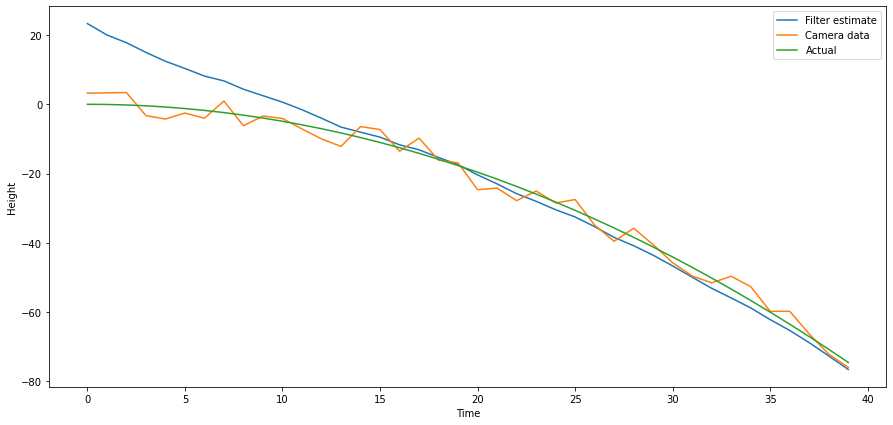

In [72]:
plt.figure(figsize=(15,7))
plt.plot(times, state_means[:,0])
plt.plot(times, sim)
plt.plot(times, actual)
plt.legend(['Filter estimate', 'Camera data', 'Actual'])
plt.xlabel('Time')
plt.ylabel('Height');

At each point in time we plot the state estimate <i>after</i> accounting for the most recent measurement, which is why we are not at position 30 at time 0. The filter's attentiveness to the measurements allows it to correct for the initial bogus state we gave it. Then, by weighing its model and knowledge of the physical laws against new measurements, it is able to filter out much of the noise in the camera data. Meanwhile the confidence in the estimate increases with time, as shown by the graph below:

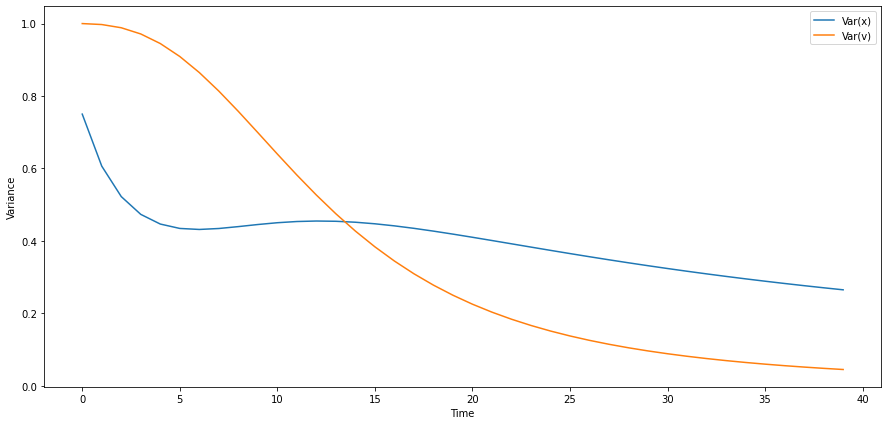

In [73]:
# Plot variances of x and v, extracting the appropriate values from the covariance matrix
plt.figure(figsize=(15,7))
plt.plot(times, state_covs[:,0,0])
plt.plot(times, state_covs[:,1,1])
plt.legend(['Var(x)', 'Var(v)'])
plt.ylabel('Variance')
plt.xlabel('Time');

The Kalman filter can also do <i>smoothing</i>, which takes in all of the input data at once and then constructs its best guess for the state of the system in each period post factum. That is, it does not provide online, running estimates, but instead uses all of the data to estimate the historical state, which is useful if we only want to use the data after we have collected all of it.

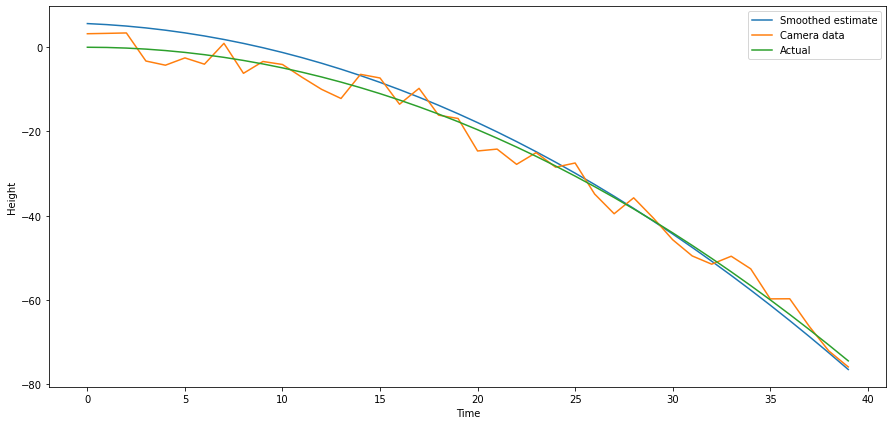

In [74]:
# Use smoothing to estimate what the state of the system has been
smoothed_state_means, _ = kf.smooth(sim)

# Plot results
plt.figure(figsize=(15,7))
plt.plot(times, smoothed_state_means[:,0])
plt.plot(times, sim)
plt.plot(times, actual)
plt.legend(['Smoothed estimate', 'Camera data', 'Actual'])
plt.xlabel('Time')
plt.ylabel('Height');

### Example: Estimating Moving Average

Because the Kalman filter updates its estimates at every time step and tends to weigh recent observations more than older ones, it can be used to estimate rolling parameters of the data. When using a Kalman filter, there's no window length that we need to specify. This is useful for computing the moving average or for smoothing out estimates of other quantities.

Below, we'll use both a Kalman filter and an n-day moving average to estimate the rolling mean of a dataset. We construct the inputs to the Kalman filter as follows:

* The mean is the model's guess for the mean of the distribution from which measurements are drawn. This means our prediction of the next value is equal to our estimate of the mean. 
* Hopefully the mean describes our observations well, hence it shouldn't change significantly when we add an observation. This implies we can assume that it evolves as a random walk with a small error term. We set the transition matrix to 1 and transition covariance matrix is a small number.
* We assume that the observations have variance 1 around the rolling mean (1 is chosen randomly). 
* Our initial guess for the mean is 0, but the filter realizes that that is incorrect and adjusts.

Processing data for stock: SPY
Processing data for stock: MSFT
Processing data for stock: ADBE
20% done...
40% done...
60% done...
80% done...


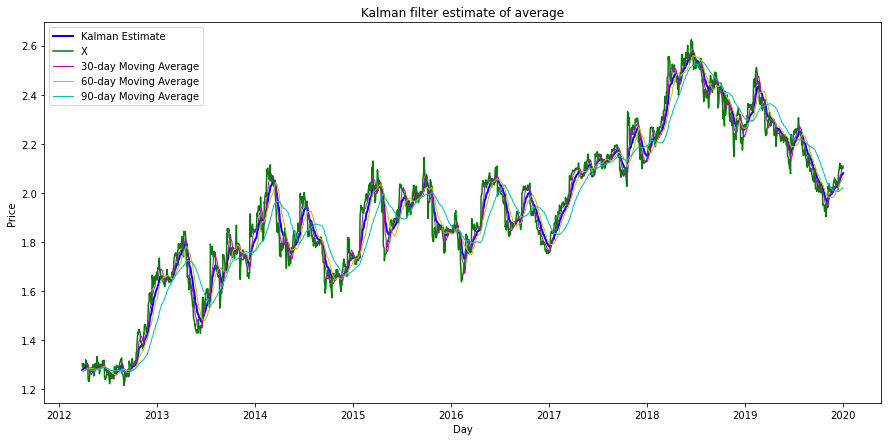

In [75]:
# Load pricing data for a security
startDateStr = '2012/01/01'
endDateStr = '2020/01/01'
cachedFolderName = './Data/'
dataSetId = 'testPairsTrading'
instrumentIds = ['SPY','MSFT','ADBE']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')

# Get adjusted closing price
data = ds.getBookDataByFeature()['adjClose']

# Data for Adobe
S1 = data['ADBE']
# Data for Microsoft
S2 = data['MSFT']

# Take ratio of the adjusted closing prices
x = S1/S2

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=x.index)

# Compute the rolling mean with various lookback windows
mean30 = x.rolling(window = 10).mean()
mean60 = x.rolling(window = 30).mean()
mean90 = x.rolling(window = 60).mean()

# Plot original data and estimated mean
plt.figure(figsize=(15,7))
plt.plot(state_means[60:], '-b', lw=2, )
plt.plot(x[60:],'-g',lw=1.5)
plt.plot(mean30[60:], 'm', lw=1)
plt.plot(mean60[60:], 'y', lw=1)
plt.plot(mean90[60:], 'c', lw=1)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price');

#### Observations

As you can see, the estimate from Kalman Filter is usually somewhere between day 30 and day 60 moving average. This could be because the Filter updates its knowledge of the world based on the most recent data. The advantage of the Kalman filter is that we don't need to select a window length. It makes predictions based on the underlying model (that we set parameters for) and the data itself. We do open ourselves up to overfitting with some of the initialization parameters for the filter, but those are slightly easier to objectively define. There's no free lunch and we can't eliminate overfitting, but a Kalman Filter is more rigorous than a moving average and generally better.

### Example: linear regression

Let's try using a Kalman filter to find linear regression lines for a dataset. We'll be comparing a stock price with the S&P 500, so the result will be a sort of rolling alpha and beta for the stock, where $\alpha$ and $\beta$ are the parameters of the linear regression equation
$$ y_t \approx \alpha + \beta x_t $$

Below we use colors to indicate the dates that the data points $(x_t, y_t)$ correspond to.

In [76]:
# Load pricing data
startDateStr = '2012/01/01'
endDateStr = '2020/01/01'
cachedFolderName = './Data/'
dataSetId = 'testPairsTrading'
instrumentIds = ['AMZN','SPY']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')

# Get adjusted closing price
data = ds.getBookDataByFeature()['adjClose']

# Data for Adobe
y = data['AMZN']
# Data for Microsoft
x = data['SPY']

Processing data for stock: AMZN
Processing data for stock: SPY
20% done...
40% done...
60% done...
80% done...


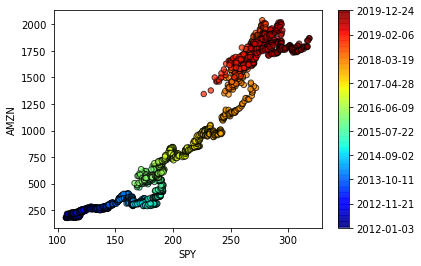

In [77]:
# Plot data and use colormap to indicate the date each point corresponds to
cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(x))
sc = plt.scatter(x, y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in x[::len(x)//9].index])
plt.xlabel('SPY')
plt.ylabel('AMZN');

Let's figure out the inputs to our Kalman filter. We'll say that the state of our system is the line that the observations are following, with parameters $\alpha$ and $\beta$. Our inital guesses for these parameters is (0,0), with a covariance matrix (which describes the error of our guess) of all ones. As in the example of the rolling mean, we assume that our parameters follow a random walk (transition matrix is the identity) with a small error term (transition covariance is a small number times the identity).

To get from the state of our system to an observation, we dot the state $(\beta, \alpha)$ with $(x_i, 1)$ to get $\beta x_i + \alpha \approx y_i$, so our observation matrix is just a column of 1s glued to $x$. We assume that the variance of our observations $y$ is 2. Now we are ready to use our observations of $y$ to evolve our estimates of the parameters $\alpha$ and $\beta$.

In [78]:
delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  transition_covariance=trans_cov)

In [79]:
# Use the observations y to get running estimates and errors for the state parameters
state_means, state_covs = kf.filter(y.values)

Below we plot the means - that is, our best estimates - of $\alpha$ and $\beta$ over time.

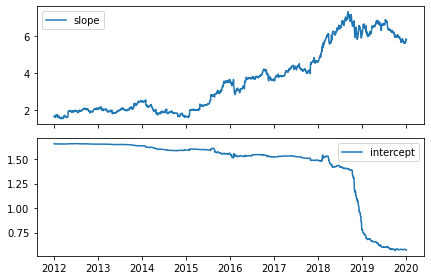

In [80]:
_, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x.index, state_means[:,0], label='slope')
axarr[0].legend()
axarr[1].plot(x.index, state_means[:,1], label='intercept')
axarr[1].legend()
plt.tight_layout();

Notice how much the parameters fluctuate over long periods of time. If we are basing a trading algorithm on this, such as something that involves beta hedging, it's important to have the best and most current estimate of the beta. To visualize how the system evolves through time, we plot every fifth state (linear model) below. For comparison, in black we have the line returned by using ordinary least-squares regression on the full dataset, which is very different.

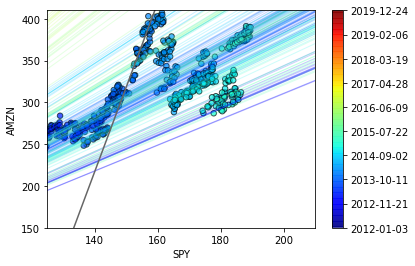

In [81]:
# Plot data points using colormap
sc = plt.scatter(x, y, s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in x[::len(x)//9].index])

# Plot every fifth line
step = 5
xi = np.linspace(x.min()-5, x.max()+5, 2)
colors_l = np.linspace(0.1, 1, len(state_means[::step]))
for i, beta in enumerate(state_means[::step]):
    plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=1, c=cm(colors_l[i]))
    
# Plot the OLS regression line
plt.plot(xi, poly1d(np.polyfit(x, y, 1))(xi), '0.4')

# Adjust axes for visibility
plt.axis([125, 210, 150, 410])

# Label axes
plt.xlabel('SPY')
plt.ylabel('AMZN');

Notice that although all of the state estimates take into account all previous observations, they fit the more recent data better than the older data. This allows the filter to adapt to structural changes in the data over time.

Now, most of the time we care about correlation in returns more than correlation in prices, so let's quickly use the same linear regression structure on the returns data:

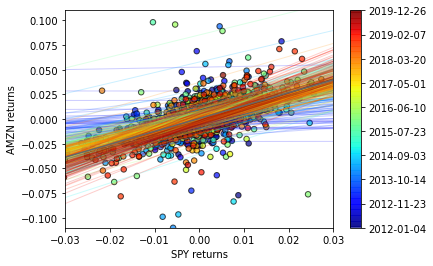

In [82]:
# Get returns from pricing data
x_r = x.pct_change()[1:]
y_r = y.pct_change()[1:]

# Run Kalman filter on returns data
delta_r = 1e-2
trans_cov_r = delta_r / (1 - delta_r) * np.eye(2) # How much random walk wiggles
obs_mat_r = np.expand_dims(np.vstack([[x_r], [np.ones(len(x_r))]]).T, axis=1)
kf_r = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y_r is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat_r,
                  observation_covariance=.01,
                  transition_covariance=trans_cov_r)
state_means_r, _ = kf_r.filter(y_r.values)

# Plot data points using colormap
colors_r = np.linspace(0.1, 1, len(x_r))
sc = plt.scatter(x_r, y_r, s=30, c=colors_r, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in x_r[::len(x_r)//9].index])

# Plot every fifth line
step = 5
xi = np.linspace(x_r.min()-4, x_r.max()+4, 2)
colors_l = np.linspace(0.1, 1, len(state_means_r[::step]))
for i, beta in enumerate(state_means_r[::step]):
    plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=1, c=cm(colors_l[i]))

# Plot the OLS regression line
plt.plot(xi, poly1d(np.polyfit(x_r, y_r, 1))(xi), '0.4')

# Adjust axes for visibility
plt.axis([-0.03,0.03,-0.11, 0.11])

# Label axes
plt.xlabel('SPY returns')
plt.ylabel('AMZN returns');

Although the raw data is much more jumbled here, we can see the regression line evolving, even swinging past the OLS regression line.

We'll be using Kalman filters for Pairs trading the subsequent notebook. Make sure you try to run the examples given here with various hyperparameters for the underlying Kalman filter model to get comfortable with the same and developing a better understanding in the process. For example you can try out the following:
1. Use multi dimensional transition matrices so as to use more of past information for making predictions at each point
2. Try different values of observation and transition covariance

### Example: Pairs Trading

In the previous notebook we made use of 60 day window for calculating mean and standard deviation of our time series. Now we'll be replacing that with Kalman filters

#### Let's get the same data that we used in the previous notebook

In [83]:
startDateStr = '2010/10/01'
endDateStr = '2020/10/01'
cachedFolderName = 'Data/'
dataSetId = 'testPairsTrading2'
instrumentIds = ['ADBE','MSFT']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']

Processing data for stock: ADBE
Processing data for stock: MSFT
20% done...
40% done...
60% done...
80% done...


#### A quick visualization of error and standard deviations

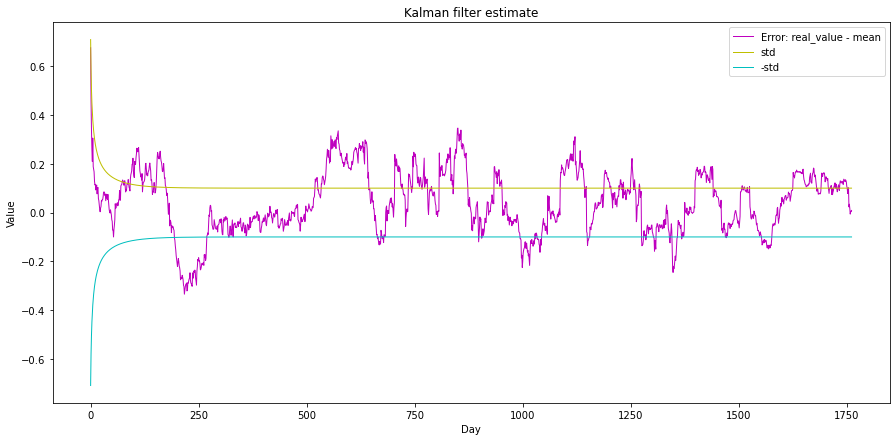

In [84]:
S1, S2 = data['ADBE'].iloc[:1762], data['MSFT'].iloc[:1762]
ratios = S1/S2

kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.0001)

state_means, state_cov = kf.filter(ratios.values)
state_means, state_std = state_means.squeeze(), np.std(state_cov.squeeze())

plt.figure(figsize=(15,7))
plt.plot(ratios.values - state_means, 'm', lw=1)
plt.plot(np.sqrt(state_cov.squeeze()), 'y', lw=1)
plt.plot(-np.sqrt(state_cov.squeeze()), 'c', lw=1)
plt.title('Kalman filter estimate')
plt.legend(['Error: real_value - mean', 'std', '-std'])
plt.xlabel('Day')
plt.ylabel('Value');


We'll be using the z score in the same way as before. Our strategy is to go long or short only in the areas where the |error| is greater than one standard deviation. Since 1 day price could be noisy, we'll be using 5 day average for a particular day's price

#### Let's modify our trading function to make use of Kalman Filter while keeping the same logic for carrying out trades

In [85]:
def trade(S1, S2):
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    
    kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.001)
    
    state_means, state_cov = kf.filter(ratios.values)
    state_means, state_std = state_means.squeeze(), np.std(state_cov.squeeze())
    
    window = 5
    ma = ratios.rolling(window=window,
                               center=False).mean()
    zscore = (ma - state_means)/state_std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money


In [86]:
trade(data['ADBE'].iloc[:1762], data['MSFT'].iloc[:1762])

1574.6922312418578

The strategy is still profitable! You can try changing the hyperparameters of the Kalman Filter and see how it affects the PnL. The results might not be always better than the mean over moving window. You can try this with other instruments as well.

#### Generalizations

We can use a Kalman filter to model non-linear transition and observation functions, as well. For this purpose there exist extended and unscented Kalman filters, the latter of which is included in `pykalman`. These can even model situations where noise is not additive (for example, where noise is proportional to the size of the measurement). We can also specify non-Gaussian errors; this is useful in financial data, which tends to have heavy-tailed distributions.

There are also algorithms for inferring some of the input parameters, such as the covariance matrices and initial state, from an initial set of data. This can be done with the `pykalman.em()` method.

--- 
---

## D. Fourier Analysis: wavelet transformation (Haar) <a id="8"></a>


<blockquote>
    <p>The Fourier Transform takes its name from the French mathematician Jean-Baptiste Joseph Fourier. In 1807 he found that arbitrary functions could be written as a summation of sines and cosines. <br>
The Fourier Transform makes it possible to decompose the original time signal into sinusoids. Each sinusoid has an associated amplitude, phase, and frequency. This is illustrated in the Figurebelow.</p>
  
</blockquote>
<br><br>



<a ><img src="https://community.sw.siemens.com/servlet/rtaImage?eid=ka54O000000PJMU&feoid=00N4O000006LZn5&refid=0EM4O00000113Qp" Width="800" align="center"> </a>


### Fourier vs Wavelet 

*The difference between a Sine-wave and a Wavelet: The sine-wave is infinitely long and the Wavelet is localized in time.*
<br>
<br>

<a ><img src="https://ars.els-cdn.com/content/image/1-s2.0-S0165027000002508-gr1.gif" Width="500" align="center"> </a>

<br>
<br>
For Stock Markets the latter is optimal — Financial Markets do not move like continuous functions.

Wavelets are mathematical functions that decompose data into different frequency components, after which each component is studied with a resolution matched to its scale, where a scale denotes a time horizon. Wavelet filtering is closely related to the volatile and timevarying characteristics of the real-world time series and is not limited by the stationarity assumption. The wavelet transform decomposes a process into different scales, making it useful in distinguishing seasonality, revealing structural breaks and volatility clusters, and identifying local and global dynamic properties of a process at specific timescales.

Wavelet theory is applied for data preprocessing, since the representation of a wavelet can deal with the non-stationarity involved in the economic and financial time series. The key property of wavelets for economic analysis is decomposition by time scale. Economic and financial systems contain variables that operate on various time scales simultaneously; thus, the relations between variables may differ across time scales. One of the benefits of the wavelet approach is that it is flexible in handling highly irregular data series.
A wavelet not only decomposes the data in terms of times and frequency, but also significantly reduces the processing time. Let $n$ denote the time series size, then the wavelet decomposition used in this study can be determined in $O(n)$ time.
Wavelets theory is based on Fourier analysis, which represents any function as the sum of the sine and cosine functions. A wavelet $\psi(t)$ is simply a function of time $t$ that obeys a basic rule, known as the wavelet admissibility condition:

$$
C_{\psi}=\int_{0}^{\infty} \frac{|\psi(f)|}{f} d f<\infty
$$

where $\psi(f)$ is the Fourier transform and a function of frequency $f$, of$\psi(t)$

The wavelet transform (WT) is a mathematical tool that can be applied to numerous applications, such as image analysis and signal processing. It was introduced to solve problems associated with the Fourier transform as they occur. This occurrence can take place when dealing with non-stationary signals, or when dealing with signals that are localized in time, space, or frequency. Depending on the normalization rules, there are two types of wavelets within a given function/family. Father wavelets describe the smooth and low-frequency parts of a signal, and mother wavelets describe the detailed and high-frequency components. In the following equations, (2a) represents the father wavelet and (2b) represents the mother wavelet, with $j=1,...,J$ in the $J$-level wavelet decomposition:


$$
\begin{array}{l}\phi_{j, k}=2^{-j / 2} \phi\left(t-2^{j} k / 2^{j}\right) \\ \psi_{j, k}=2^{-j / 2} \psi\left(t-2^{j} k / 2^{j}\right)\end{array}
$$

where $J$ denotes the maximum scale sustainable by the number of data points and the two types of wavelets stated above, namely father wavelets and mother wavelets, and satisfies:

$$
\int \phi(t) d t=1 \text { and } \int \psi(t) d t=0
$$

Time series data, i.e., function $f(t)$, is an input represented by wavelet analysis, and can be built up as a sequence of projections onto father and mother wavelets indexed by both ${k}, k = {0, 1, 2,...}$ and by ${s}=2^j, {j=1, 2, 3,...J}$. Analyzing real discretely sampled data requires creating a lattice for making calculations. Mathematically, it is convenient to use a dyadic expansion, as shown in equation (3). The expansion coefficients are given by the projections:

$$
\begin{aligned} s_{J, k} &=\int \phi_{J, k} f(t) d t \\ d_{j, k} &=\int \psi_{j, k} f(t) d t(j=1,2, \ldots, J) \end{aligned}
$$

The orthogonal wavelet series approximation to $f(t)$ is defined by:

$$
\begin{aligned} f(t)=& \sum_{k} s_{J, k} \phi_{J, k}(t)+\sum_{k} d_{J, k} \psi_{J, k}(t)+\sum_{k} d_{J-1, k} \psi_{J-1, k}(t) \\ &+\cdots+\sum_{k} d_{1, k} \psi_{1, k}(t) \end{aligned}
$$

Another brief form can also be represented:

$$
\begin{array}{l}f(t)=S_{J}(t)+D_{J}(t)+D_{J-1}(t)+\cdots+D_{1}(t) \\ S_{J}(t)=\sum_{k} s_{J, k} \phi_{J, k}(t) \\ D_{J}(t)=\sum_{k} d_{J, k} \psi_{J, k}(t)\end{array}
$$

The WT is used to calculate the coefficient of the wavelet series approximation in Eq. (5) for a discrete signal $f_1, f_2,...,f_n$ with finite extent. The WT maps the vector $f=(f_1, f_2,...,f_n)$ to a vector of n wavelet coefficients $w=(w_1, w_2,...,w_n)$, which contains both the smoothing coefficient $s_J,k$ and the detail coefficients $d_j,k,j=1,2,...,J$. The symbol $s_j,k$ describes the underlying smooth behavior of the signal at coarse scale $2^J$ , while $d_j,k$ describes the coarse scale deviations from the smooth behavior, and $d_j−1,k ,. . .,d1,k$ provides progressively finer scale deviations from the smooth behavior.
When $n$ is divisible by $2^J, d_1,k$ contains $n/2$ observations at the finest scale $2^1 = 2$, and $n/4$ observations in $d_2,k$ at the second finest scale, $2^1 = 2$. Likewise, each of $d_j,k$ and $s_j,k$ contain $n/2^J$ observations, where:



$$
n=n / 2+n / 4+\cdots+n / 2^{J-1}+n / 2^{J}
$$

Let $f(t)$ denote the original data, $S_1$, represents an approximation signal, and $D_1$ is a detailed signal. This study defines the multi-resolution decomposition of a signal by specifying: $S_J$ is the coarsest scale and $S_J−1 = SJ + DJ$ . Generally, $S_j−1 = S_j + D_j$ where ${S_J , S_J−1 ,. . .,S_1 }$ is a sequence of multi-resolution approximations of the function $f(t)$, with ever increasing levels of refinement. The corresponding multi-resolution decomposition of $f(t)$ is given by ${S_J, D_J, D_J−1,. . .D_j,. . .,D_1}$.
The sequence of terms $S_J, D_J, D_J−1,...D_j,...,D_1$ represents a set of orthogonal signal components that represent the signal at resolutions $1$ to $J$. Each $D_J−k$ provides the orthogonal increment to the
$J_−k$ representation of the function $f(t)$ at the scale (or resolution) $2^J−k$ .
When the data pattern is very rough, the wavelet process is repeatedly applied. The aim of preprocessing is to minimize the Root Mean Squared Error (RMSE) between the signal before and after transformation. The noise in the original data can thus be removed. Importantly, the adaptive noise in the training pattern may reduce the risk of overfitting in training phase. Thus, we adopt WT twice for the preprocessing of training data.

in Python:
```js

#!pip install pywavelets
import pywt

cA, cD = pywt.dwt(data, "haar")
```

--- 
---

## E. Exponential Smoothing <a id="9"></a>

#### Properties and types of series
- **Trend** : A long-term increase or decrease in the data. This can be seen as a slope (is doesn’t have to be linear) roughly going through the data.
- **Seasonality** : A time series is said to be seasonal when it is affected by seasonal factors (hour of day, week, month, year, etc.). Seasonality can be observed with nice cyclical patterns of fixed frequency.
- **Cyclicity** : A cycle occurs when the data exhibits rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.
- **Residuals** : Each time series can be decomposed in two parts:
    - A forecast, made up of one or several forecasted values
    - Residuals. They are the difference between an observation and its predicted value at each time step. Remember that

#### Decomposition of a time series

Each time series can be thought as a mix between several parts :
- A trend (upward or downwards movement of the curve on the long term)
- A seasonal component
- Residuals

Here is what our time series looks like when broken down into the above components:

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

startDateStr = '2017/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'

instrumentIds = ['VFC']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
series = ds.getBookDataByFeature()['adjClose']

Processing data for stock: VFC
20% done...
40% done...
60% done...
80% done...


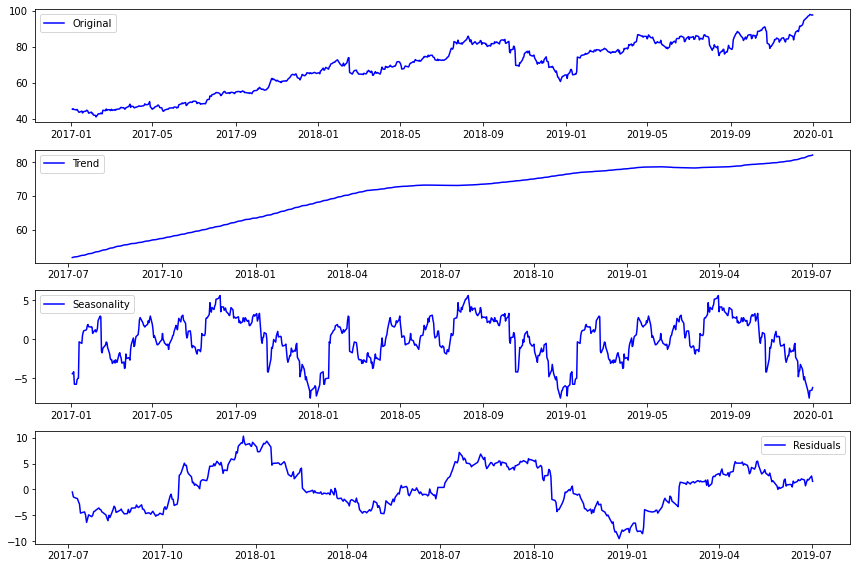

In [175]:
decomposition = seasonal_decompose(series['VFC'], model='additive', period = 253)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(series['VFC'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()


#### The golden rule: Stationarity
Before going any further into our analysis, our series has to be made stationary.
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary.
Transforms used for stationarizing data:
De-trending : We remove the underlying trend in the series. This can be done in several ways, depending on the nature of data :
- Indexed data: data measured in currencies are linked to a price index or related to inflation. Dividing the series by this index (ie deflating) element-wise is therefore the solution to de-trend the data.
- Non-indexed data: is it necessary to estimate if the trend is constant, linear or exponential. The first two cases are easy, for the last one it is necessary to estimate a growth rate (inflation or deflation) and apply the same method as for indexed data.
Differencing : Seasonal or cyclical patterns can be removed by substracting periodical values. If the data is 12-month seasonal, substracting the series with a 12-lag difference series will give a “flatter” series
Logging : in the case where the compound rate in the trend is not due to a price index (ie the series is not measured in a currency), logging can help linearize a series with an exponential trend (recall that $log(exp(x)) = x$). It does not remove an eventual trend whatsoever, unlike deflation.

We already covered Stationarity and Augmented Dickey-Fuller Tests last Lecture.

#### Smoothing methods
Smoothing methods work as weighted averages. Forecasts are weighted averages of past observations. The weights can be uniform (this is a moving average), or following an exponential decay — this means giving more weight to recent observations and less weight to old observations. More advanced methods include other parts in the forecast, like seasonal components and trend components.
We will use the component form for our mathematical equations. y will denote our time series, p our forecast, l the level, s the seasonal component and b the trend component
Simple Exponential Smoothing
*When to use?*: Few data points, Irregular data, No seasonality or trend.

*Math behind* : Just keep in mind that SES only has one component called level (with a smoothing parameter denoted as “alpha” below). It is a weighted average of the previous level and the current observation:
$$
p_{t}=l_{t}
$$
$$
l_{t}= \alpha y_{t}+(1- \alpha)l_{t-1}
$$


#### Why? 

More recent Datapoints have more weight than older Datapoints!

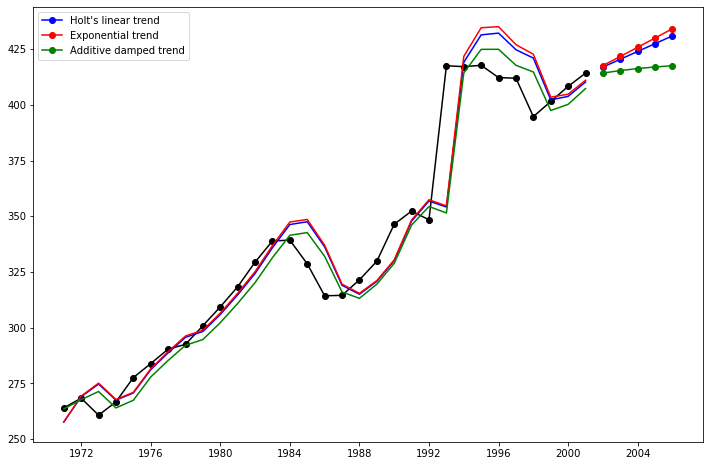

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock = pd.Series(data, index)

fit1 = Holt(livestock, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(livestock, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(livestock, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(livestock, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

---
---

# 3. Artificial Intelligence <a id="10"></a>

##### Quick Overview on the most widespread Implementations of AI in Finance

<a ><img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/William_of_Ockham_-_Logica_1341.jpg" style="padding-left: 20px; padding-bottom: 20px;"  width="250" align="right"> </a>

> <i> "When presented with competing hypotheses about the same prediction, <br> one should select the solution with the fewest assumptions" </i> — **Ockham's Razor**

<br>


**AI Models are prone to overfit on financial time series. There are barely any cases where it is necessary to use an AI approach. This is the reason the following examples will have no code snippets. Due to advances in AI, it's as easy to *plug and play* a Deep Neural Network, as a simple linear regression, but the outcome will have no usefull meaning.
But if you are keen on learning more, we can add another Lecture with more in depth examples of AI applications in Finance.**

## A. Deep Neural Networks (DNN) <a id="11"></a>

<a ><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/OH3gI.png"  width="450" align="right"> </a>

A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers. For example, a DNN that is trained to recognize dog breeds will go over the given image and calculate the probability that the dog in the image is a certain breed. The user can review the results and select which probabilities the network should display (above a certain threshold, etc.) and return the proposed label. Each mathematical manipulation as such is considered a layer, and complex DNN have many layers, hence the name "deep" networks.

DNNs can model complex non-linear relationships. DNN architectures generate compositional models where the object is expressed as a layered composition of primitives. The extra layers enable composition of features from lower layers, potentially modeling complex data with fewer units than a similarly performing shallow network.

Deep architectures include many variants of a few basic approaches. Each architecture has found success in specific domains. It is not always possible to compare the performance of multiple architectures, unless they have been evaluated on the same data sets.

DNNs are typically feedforward networks in which data flows from the input layer to the output layer without looping back. At first, the DNN creates a map of virtual neurons and assigns random numerical values, or "weights", to connections between them. The weights and inputs are multiplied and return an output between 0 and 1. If the network did not accurately recognize a particular pattern, an algorithm would adjust the weights. That way the algorithm can make certain parameters more influential, until it determines the correct mathematical manipulation to fully process the data.

### Excerpt from academical approach 

This brief description of DNNs follows Candel et al. (2016); Dixon et al. (2015). A deep neural network consists of an input layer, one or more hidden layers, and an output layer, forming the topology of the net. The input layer matches the feature space, so that there are as many input neurons as predictors. The output layer is either a classification or regression layer to match the output space. All layers are composed of neurons, the basic units of such a model. In the classical feedforward architecture, each neuron in the previous layer l is fully connected with all neurons in the subsequent layer l + 1 via directed edges, each representing a certain weight. Also, each neuron in a non-output layer of the net has a bias unit, serving as its activation threshold. As such, each neuron receives a weighted combination α of the nl outputs of the neurons in the previous layer l as input,

$$
\alpha=\sum_{i=1}^{n_{l}} w_{i} x_{i}+b
$$


with wi denoting the weight of the output xi and b the bias. The weighted combination α of (2) is transformed via some activation function f, so that the output signal f (α) is relayed to the neurons in layer l + 1. Following Goodfellow et al. (2013), we use the maxout activation function $f: \mathbb{R}^{2} \rightarrow \mathbb{R}$

$$
f\left(\alpha_{1}, \alpha_{2}\right)=\max \left(\alpha_{1}, \alpha_{2}\right)
$$

receiving inputs from two separate channels with its own weights and biases. Our choice is motivated by the fact that maxout ”activation works particularly well with dropout” (Candel et al., 2016, p. 12) - a modern regularization technique.
For the entire network, let W be the collection $W=\bigcup_{l=1}^{L-1} W_{l}$, with Wl denoting the l=1
weight matrix that connects layers $l$ and $l + 1$ for a network of $L$ layers. Analogously, let $B$ be the collection $B=\bigcup_{l=1}^{L-1} b_{l}$, with $b_{l}$ denoting the column vector of biases for layer $l$. The collections $W$ and $B$ fully determine the output of the entire DNN. Learning is implemented
by adapting these weights in order to minimize the error on the training data. In particular, the objective is to minimize some loss function $\mathcal{L}(W, B \mid j)$ for each training example j. Since we are dealing with a classification problem, the loss function is cross-entropy,

$$
\mathcal{L}(W, B \mid j)=-\sum_{y \in \mathcal{O}}\left(\ln \left(o_{y}^{(j)}\right) t_{y}^{(j)}+\ln \left(1-o_{y}^{(j)}\right)\left(1-t_{y}^{(j)}\right)\right)
$$

with y representing the output units and $\mathcal{O}$ the output layer. This loss function is min- imized by stochastic gradient descent, with the gradient of the loss function $\nabla \mathcal{L}(W, B \mid j)$ being calculated via backpropagation. In the course of this optimization, we take advantage of two advanced methods via H2O. First, we use dropout - a modern form of regularization introduced by Srivastava et al. (2014). Thereby, each neuron suppresses its activation with a certain dropout probability during forward propagation for a given training example. As such, instead of one architecture, effectively $2^N$ architectures are trained, with $N$ denoting the number of training examples. The resulting network thus represents an ensemble of an exponentially large number of averaged models. This regularization method helps to avoid overfitting and improves generalization abilities. Second, we use an advanced optimization routine in H2O called ADADELTA (Candel et al., 2016; Zeiler, 2012), combining the advantages of momentum learning and rate annealing. The former aids in avoiding local minima and the latter helps in preventing ”optimum skipping” in the optimization landscape (Zeiler, 2012).
”The design of an ANN is more of an art than a science” (Zhang et al., 1998, p. 42), and
tuning parameters are often determined via computationally highly intensive hyperpareme-
ter optimization routines and cross-validation. Instead, we opt for a pragmatic approach and
fix the tuning parameters based on the literature. First, let us describe the topology of the
net with the following code: I-H1-H2-H3-O. I denotes the number of input neurons, H1, H2,
and H3 the number of hidden neurons in hidden layers 1, 2, 3, and O the number of output
neurons. In this respect, we choose a 31-31-10-5-2 architecture. The input layer matches
the input space with 31 features. Overfitting is a major issue: researchers have provided
empirical rules to restrict the number of hidden nodes. Of course, none of theses heuristics
works well for each and every problem. A popular rule to set the number of neurons in the
first hidden layer of a feedforward network is to use as many neurons as there are inputs.
We follow this recommendation in our application. Via the second and third hidden layer,
we introduce a bottleneck, enforcing a reduction in dimensionality in line with Takeuchi and
Lee (2013); Dixon et al. (2015). 
The output layer matches the binary output space. This
configuration requires the estimation of 2746 parameters, so we have more than 136 training examples per parameter, yielding robust results. Second, we perform regularization. In particular, we use a hidden dropout ratio of 0.5, which ”seems to be close to optimal for a wide range of networks and tasks” (Srivastava et al., 2014, p. 1930) and an input dropout ratio of 0.1, again in line with the suggestions in Srivastava et al. (2014). Also, we perform slight L1 regularization with shrinkage parameter $\lambda_{D N N}=0.00001$. Third, we train with 400 epochs, i.e., we pass 400 times over the training set, as in Huck (2009). For the sake of reproducibility, we set the seed to one, run all calculations on a single core to suppress hardware-based stochastics, and leave all potential further tuning parameters at their H2O default values.
At this stage, we would like to point out that our network is still relatively small with only 31 inputs and 2746 parameters. Deep learning allows for large-scale models with thousands of features and millions of parameters, offering significant potential for further studies. How- ever, for starting to bridge the gap between academic and professional finance, our model is sufficient, computationally not too costly, and exhibits state-of-the-art features, i.e., dropout regularization, maxout activation, and ADADELTA optimization.


---

## B. Gradient-Boosted-Trees (GBT) <a id="12"></a>

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

### Excerpt from academical approach 

<a ><img src="https://arogozhnikov.github.io/images/gbdt_attractive_picture.png"  width="550" align="right"> </a>
Boosting is introduced with the seminal paper of Schapire (1990), describing a method for ”converting a weak learning algorithm into one that achieves arbitrarily high accuracy” (Schapire, 1990, p. 197). This method is formalized in the algorithm ”AdaBoost” of Freund and Schapire (1997), originally applied to classification problems. Boosting works by sequentially applying weak learners to repeatedly re-weighted versions of the training data (Hastie et al., 2009). After each boosting iteration, misclassified examples have their weights increased, and correctly classified examples their weights decreased. Hence, each successive classifier focuses on examples that have been hard to classify in the previous steps. After a number of iterations $M_{GBT}$ , the predictions of the series of weak classifiers are combined by a weighted majority vote into a final prediction. Stochastic gradient boosting is a variation introduced by Friedman (2002), where we sample - without replacement - a subset of the training data upon each iteration to fit the base learner. We use a slightly different approach and select $m_{GBT}$ features at random from the p features upon every split. This subsampling procedure increases computational efficiency, generally improves performance, and decorrelates the trees. We use H2O’s implementation of AdaBoost, deploying shallow decision trees as weak learners. For further details, see Click et al. (2016). We have four parameters to set: The number of trees or boosting iterations $M_{GBT}$ , the depth of the tree $J_{GBT}$ , the learning rate $\lambda_{GBT}$ , and the subset of features to use at each split, i.e., $m_{GBT}$ . Boosting may potentially overfit, if $M_{GBT}$ is too large, so we fix the number of iterations to 100 - a very conservative value compared to examples provided in the standard literature, as in Hastie et al. (2009). Boosting relies on weak learners, i.e., shallow trees, which generally result in the highest performance (Click et al., 2016). As stumps with only one split allow for no variable interaction effects, we settle for a value of $J_{GBT} = 3$, allowing for two-way interactions. Learning rate and number of trees are in an inverse relationship given constant error rates. Hastie et al. (2009) suggest learning rates smaller than 0.1. Taking into account the low number of trees, we settle for the upper end of the spectrum and fix $\lambda_{GBT}$ at 0.1. For $m_{GBT}$ , we use 15, i.e., half of the available feature space - a share motivated by Friedman (2002). All other tuning parameters are at their default values and the seed is fixed to one.


--- 
---

## C. Random Forests (RAF) <a id="13"></a>

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

### Excerpt from academical approach 

<a ><img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png"  width="390" align="right"> </a>
In the case of boosting, we successively fit shallow decision trees, each taking into account the classification error of the previous trees to build a strong ensemble of weak learners. In contrast, random forests consist of many deep but decorrelated trees built on different samples of the data. They have been introduced by Breiman (2001) and feature high popularity as they are simpler to deploy than boosting. The algorithm to grow a random forest is relatively simple. For each of the $B_{RAF}$ trees in the random forest, we first draw a random subset from the original training data. Then, we grow a modified decision tree to this sample, whereby we select $m_{RAF}$ features at random from the p features upon every split. We grow the tree to the maximum depth of $J_{RAF}$ . The final output is an ensemble of $B_{RAF}$ random forest trees, so that classification can be performed via majority vote. Subsampling sub- stantially reduces variance of (low bias) trees and the random feature selection decorrelates them. We have three tuning parameters, i.e., the number of trees $B_{RAF}$ , their maximum depth $J_{RAF}$ , and the number of features to randomly select $m_{RAF}$ . Random forests are not prone to overfit, so we can choose a high $B_{RAF}$ of 1000 trees. We fix the maximum depth $J_{RAF}$ at 20, a default value in machine learning allowing for substantial higher order inter- actions (H2O, 2016). Regarding the feature subsampling, we typically choose $m_{RAF}=\lfloor\sqrt{p}\rfloor$ (James et al., 2014).

--- 
---

## D. Reinforcement Learning (RL) <a id="14"></a>

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

### Early Reinforcement Learning

With the advances of modern computing power, the study of Reinforcement Learning is having a heyday. Machines are now able to learn complex tasks once thought to be solely in the domain of humans, from controlling the heating and cooling in massive data centers to beating grandmasters at Starcraft. As magnificent as it may seem today, it had humble roots many decades ago. Seeing how far it's come, it's a wonder to see how far it will go!



### Value Iteration

Let's turn the clock back on our time machines to 1957 to meet Mr. [Richard Bellman](https://en.wikipedia.org/wiki/Richard_E._Bellman). Bellman started his academic career in mathematics, but due to World War II, left his postgraduate studies at John Hopkins to teach electronics as part of the war effort (as chronicled by J. J. O'Connor and E. F. Robertson [here](https://www-history.mcs.st-andrews.ac.uk/Biographies/Bellman.html)). When the war was over, and it came time for him to focus on his next area of research, he became fascinated with [Dynamic Programming](https://en.wikipedia.org/wiki/Dynamic_programming): the idea of breaking a problem down into sub-problems and using recursion to solve the larger problem.

Eventually, his research landed him on [Markov Decision Processes](https://en.wikipedia.org/wiki/Markov_decision_process). These processes are a graphical way of representing how to make a decision based on a current state. States are connected to other states with positive and negative rewards that can be picked up along the way.

Bellman's first breakthrough with this type of problem is now known as Value Iteration ([his original paper](http://www.iumj.indiana.edu/IUMJ/FULLTEXT/1957/6/56038)). He introduced a variable, gamma (γ), to represent discounted future rewards. He also introduced a function of policy (π) that takes a state (s), and outputs corresponding suggested action (a). The goal is to find the value of a state (V), given the rewards that occur when following an action in a particular state (R).

Putting this all together, we get the Bellman Equation

$$
V(s_{t})=\max_{ a_{t} }(R(a_{t},s_{t}) + \gamma V (s_{t+1}))
$$

source: [Wikipedia](https://en.wikipedia.org/wiki/Bellman_equation)

In other words, the value of our current state, `current_values`, is equal to the discount times the value of the next state, `next_values`, given the policy the agent will follow. For now, we'll have our agent assume a greedy policy: it will move towards the state with the highest calculated value. If you're wondering what P is, don't worry, we'll get to that later.




<a ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Reinforcement_learning_diagram.svg/1059px-Reinforcement_learning_diagram.svg.png"  width="400" align="center"> </a>

Reinforcement Learning with Long-Short-Term Memory (LSTM) would be the most fitting application.

--- 
---

# 4. Positions <a id="15"></a>

## A. Thresholds for Entry and Exit <a id="16"></a>

Manage Profit with Exit Orders
To manage profit means preservation of capital. The main goal is to capture as much profit as possible. There are several different methods to achieve this. Here is a brief explanation of the more popular order types you can use.

1. **Auction:** An Auction order is entered into the electronic trading system during the pre-market opening period for execution at the Calculated Opening Price (COP). 

1. **Discretionary:** An Discretionary order is a limit order submitted with a hidden, specified ‘discretionary’ amount off the limit price which may be used to increase the price range over which the limit order is eligible to execute. The market sees only the limit price.

1. **Market:** A Market order is an order to buy or sell at the market bid or offer price. 

1. **Market If Touched:** A Market If Touched (MIT) is an order to buy (or sell) a contract below (or above) the market. Its purpose is to take advantage of sudden or unexpected changes in share or other prices and provides investors with a trigger price to set an order in motion.

1. **Pegged To Market:** A pegged-to-market order is designed to maintain a purchase price relative to the national best offer (NBO) or a sale price relative to the national best bid (NBB). Depending on the width of the quote, this order may be passive or aggressive.

1. **Pegged To Stock:** A Pegged to Stock order continually adjusts the option order price by the product of a signed user-define delta and the change of the option’s underlying stock price. The delta is entered as an absolute and assumed to be positive for calls and negative for puts. A buy or sell call order price is determined by adding the delta times a change in an underlying stock price to a specified starting price for the call. 

1. **Pegged To Primary:** Relative (a.k.a. Pegged-to-Primary) orders provide a means for traders to seek a more aggressive price than the National Best Bid and Offer (NBBO). By acting as liquidity providers, and placing more aggressive bids and offers than the current best bids and offers, traders increase their odds of filling their order. Quotes are automatically adjusted as the markets move, to remain aggressive. For a buy order, your bid is pegged to the NBB by a more aggressive offset, and if the NBB moves up, your bid will also move up. If the NBB moves down, there will be no adjustment because your bid will become even more aggressive and execute. For sales, your offer is pegged to the NBO by a more aggressive offset, and if the NBO moves down, your offer will also move down. If the NBO moves up, there will be no adjustment because your offer will become more aggressive and execute.

1. **Sweep To Fill:** Sweep-to-fill orders are useful when a trader values speed of execution over price. A sweep-to-fill order identifies the best price and the exact quantity offered/available at that price, and transmits the corresponding portion of your order for immediate execution.

1. **Limit Order:** A Limit order is an order to buy or sell at a specified price or better. The Limit order ensures that if the order fills, it will not fill at a price less favorable than your limit price, but it does not guarantee a fill.

1. **Box Top:** A Box Top order executes as a market order at the current best price. If the order is only partially filled, the remainder is submitted as a limit order with the limit price equal to the price at which the filled portion of the order executed.

1. **Limit If Touched:** A Limit if Touched is an order to buy (or sell) a contract at a specified price or better, below (or above) the market. This order is held in the system until the trigger price is touched. An LIT order is similar to a stop limit order, except that an LIT sell order is placed above the current market price, and a stop limit sell order is placed below.

1. **Limit On Close:** A Limit-on-close (LOC) order will be submitted at the close and will execute if the closing price is at or better than the submitted limit price.

1. **Limit On Open:** A Limit-on-Open (LOO) order combines a limit order with the OPG time in force to create an order that is submitted at the market’s open, and that will only execute at the specified limit price or better. Orders are filled in accordance with specific exchange rules.

1. **Passive Relative:** Passive Relative orders provide a means for traders to seek a less aggressive price than the National Best Bid and Offer (NBBO) while keeping the order pegged to the best bid (for a buy) or ask (for a sell). The order price is automatically adjusted as the markets move to keep the order less aggressive. For a buy order, your order price is pegged to the NBB by a less aggressive offset, and if the NBB moves up, your bid will also move up. If the NBB moves down, there will be no adjustment because your bid will become aggressive and execute. For a sell order, your price is pegged to the NBO by a less aggressive offset, and if the NBO moves down, your offer will also move down. If the NBO moves up, there will be no adjustment because your offer will become aggressive and execute. In addition to the offset, you can define an absolute cap, which works like a limit price, and will prevent your order from being executed above or below a specified level. The Passive Relative order is similar to the Relative/Pegged-to-Primary order, except that the Passive relative subtracts the offset from the bid and the Relative adds the offset to the bid.

1. **Stop:** A Stop order is an instruction to submit a buy or sell market order if and when the user-specified stop trigger price is attained or penetrated. A Stop order is not guaranteed a specific execution price and may execute significantly away from its stop price. A Sell Stop order is always placed below the current market price and is typically used to limit a loss or protect a profit on a long stock position. A Buy Stop order is always placed above the current market price. It is typically used to limit a loss or help protect a profit on a short sale.

1. **Stop Limit:** A Stop-Limit order is an instruction to submit a buy or sell limit order when the user-specified stop trigger price is attained or penetrated. The order has two basic components: the stop price and the limit price. When a trade has occurred at or through the stop price, the order becomes executable and enters the market as a limit order, which is an order to buy or sell at a specified price or better.

1. **Trailing Stop:** A sell trailing stop order sets the stop price at a fixed amount below the market price with an attached “trailing” amount. As the market price rises, the stop price rises by the trail amount, but if the stock price falls, the stop loss price doesn’t change, and a market order is submitted when the stop price is hit. This technique is designed to allow an investor to specify a limit on the maximum possible loss, without setting a limit on the maximum possible gain. “Buy” trailing stop orders are the mirror image of sell trailing stop orders, and are most appropriate for use in falling markets.

--- 
---

### The Capital Asset Pricing Model and Arbitrage Pricing Theory



The Capital Asset Pricing Model (CAPM) is a classic measure of the cost of capital. It is used often in finance to evaluate the price of assets and to assess the impact of the risk premium from the market at large. In this lecture, we discuss the CAPM the more general Arbitrage Pricing Theory (APT) to form a basis for evaluating the risk associated with various factors.

#### Idiosyncratic and Systematic Risk

In general, portfolios and assets can face two types of risk: idiosyncratic and systematic risk. **Idiosyncratic risk** refers to risks that are firm-specific and can be diversified away, such as a management change or a faulty production, while **systematic risk** is market-wide and affects all market participants. An example could be a slowing of the economy or a change in the interest rate. Because all firms are exposed to systematic risk, it cannot be diversified away.

#### Risk Premia

As the number of assets in a portfolio increases, many of the idiosyncratic risks cancel out and are diversified away. This is the key reason why we want to avoid position concentration risk. As your portfolio grows larger and makes more independent bets through diversification, the variance of the portfolio declines until only the systematic risk remains. As we cannot remove systematic risk, investors must be given a risk premium above the rate of risk-free return to compensate them for the risk they take on by investing in this portfolio. The individual firm-level risks in this portfolio do not have associated premia as this would create arbitrage opportunities. Shareholders could collect the risk premium while diversifying away the risk associated with them. That would mean additional profit without any additional exposure. This is the definition of an arbitrage opportunity!

From this reasoning we can conclude that the premium on an asset should have no relation to its idiosyncratic risk, but should instead rely solely on the level of systematic risk it carries. In order to accurately compute the risk premium of an asset, and consequently our expected return, we need to find a measure of systematic risk. If we have that, then we can theoretically define the return of an asset in the following way:

$$E[\mbox{Return}] = \mbox{Risk-Free Rate of Return} + \mbox{Risk Premium}$$

One way to do this is to estimate how changes in the excess return of an asset are related to changes in the excess return of the market. Expressing this as a linear regression gives us the relationship as the change in expected return of an asset for each 1% change in the return of the market portfolio.

In theory, this market portfolio should have no diversifiable risk left and would therefore only fluctuate with systematic shocks. In practice, we use a market index such as the S&P500 as a proxy for the market portfolio. The beta that we get from regressing an asset's returns on the returns of the market will be our measure of systematic risk. This beta represents the sensitivity of an asset's return stream to market-wide shocks.

Given this beta, the risk premium of asset $i$ is defined as:

$$\mbox{Risk Premium of Asset}_i = \beta (\mbox{Market Risk Premium})$$

We call this simplistic model the Capital Asset Pricing Model (CAPM).

#### Capital Asset Pricing Theory

We can express the CAPM more clearly like so:

$$E[R_i] = R_F + \beta(E[R_M] - R_F)$$

where $R_i$ is the return of asset $i$, $R_F$ is the risk-free rate, and $R_M$ is the return of the market. The CAPM is one of the most basic measures of the cost of capital. It determines the minimum return required to entice investors to hold a certain asset.

To put it another way, CAPM says that the return of an asset should be the risk-free rate, which is what we would demand to account for inflation and the time value of money, as well as something extra to compensate us for the amount of systematic risk we are exposed to.

Processing data for stock: AAPL
Processing data for stock: BIL
Processing data for stock: SPY
20% done...
40% done...
60% done...
80% done...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     304.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           4.04e-45
Time:                        21:41:30   Log-Likelihood:                 778.07
No. Observations:                 252   AIC:                            -1552.
Df Residuals:                     250   BIC:                            -1545.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.229      0.220      -0.001       0.002
SPY            1.5481      0.089     17.444      0.000       1.373       1.723
==============================================================================
Omnibus:                       49.529   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.311
Skew:                           0.192   Prob(JB):                    6.63e-134
Kurtosis:                      10.633   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

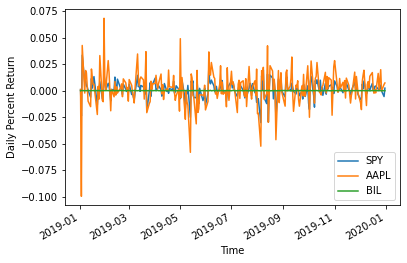

In [87]:
startDateStr = '2019/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['AAPL', 'BIL', 'SPY']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
prices = ds.getBookDataByFeature()['adjClose']


# choose stock
R = prices['AAPL'].pct_change()[1:]

# risk-free proxy
R_F = prices['BIL'].pct_change()[1:]

# find it's beta against market
M = prices['SPY'].pct_change()[1:]

AAPL_results = regression.linear_model.OLS(R-R_F, sm.add_constant(M)).fit()
AAPL_beta = AAPL_results.params[1]

M.plot()
R.plot()
R_F.plot()
plt.xlabel('Time')
plt.ylabel('Daily Percent Return')
plt.legend();

AAPL_results.summary()

We can then use our calculated beta exposure to make predictions of returns.

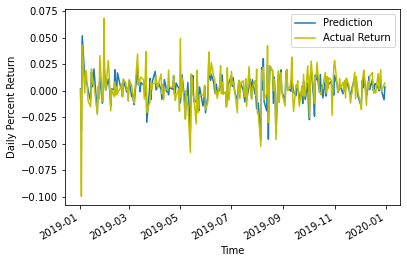

In [89]:
predictions = R_F + AAPL_beta*(M - R_F) # CAPM equation

predictions.plot()
R.plot(color='y')
plt.legend(['Prediction', 'Actual Return'])

plt.xlabel('Time')
plt.ylabel('Daily Percent Return');

#### CAPM Assumptions

In our derivation of the CAPM, we made two main assumptions:
* We assumed that investors are able to trade without delay or cost and that everyone is able to borrow or lend money at the risk free rate.
* We assumed that all investors are "mean-variance optimizers". What this essentially means is that they would only demand portfolios that have the highest return attainable for a given level of risk. These portfolios are all found along the **efficient frontier**.

The following is a programmatic derivation of the efficient frontier for portfolios of four assets.

In [90]:
from scipy import optimize
import cvxopt as opt
from cvxopt import blas, solvers

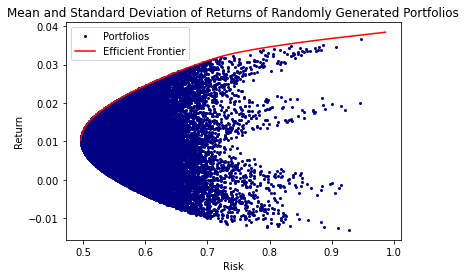

In [91]:
np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

# Number of assets
n_assets = 4

# Number of observations
n_obs = 2000

## Generating random returns for our 4 securities
return_vec = np.random.randn(n_assets, n_obs)

def rand_weights(n):
    ''' 
    Produces n random weights that sum to 1 
    '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

def optimal_portfolios(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100000
    
    # Creating a list of returns to optimize the risk for
    mus = [100**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    ## Calculate the risk and returns of the frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    return returns, risks

n_portfolios = 50000

means, stds = np.column_stack([random_portfolio(return_vec) for x in range(n_portfolios)])

returns, risks = optimal_portfolios(return_vec)

plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Mean and Standard Deviation of Returns of Randomly Generated Portfolios');

plt.plot(risks, returns, '-', markersize=3, color='red');
plt.legend(['Portfolios', 'Efficient Frontier']);

Each blue dot represents a different portfolio, while the red line skimming the outside of the cloud is the efficient frontier. The efficient frontier contains all portfolios that are the best for a given level of risk.

The optimal, or most efficient, portfolio on this line is found by maximizing the Sharpe ratio, the ratio of excess return and volatility. We use this to determine the portfolio with the best risk-to-reward tradeoff.

The line that represents the different combinations of a risk-free asset with a portfolio of risky assets is known as the Capital Allocations Line (CAL). The slope of the CAL is the Sharpe ratio. To maximize the Sharpe ratio, we need to find the steepest CAL, which coincides with the CAL that is tangential to the efficient frontier. This is why the efficient portfolio is sometimes referred to as the tangent portfolio.

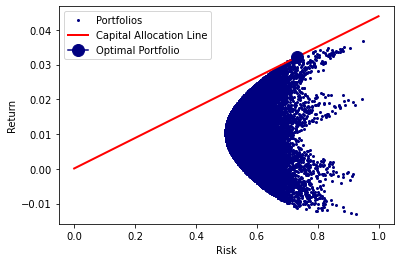

In [92]:
def maximize_sharpe_ratio(return_vec, risk_free_rate):
    """
    Finds the CAPM optimal portfolio from the efficient frontier 
    by optimizing the Sharpe ratio.
    """
    
    def find_sharpe(weights):
        
        means = [np.mean(asset) for asset in return_vec]
        
        numerator = sum(weights[m]*means[m] for m in range(len(means))) - risk_free_rate
        
        weight = np.array(weights)
        
        denominator = np.sqrt(weights.T.dot(np.corrcoef(return_vec).dot(weights)))
        
        return numerator/denominator
    
    guess = np.ones(len(return_vec)) / len(return_vec)
    
    def objective(weights):
        return -find_sharpe(weights)
    
    # Set up equality constrained
    cons = {'type':'eq', 'fun': lambda x: np.sum(np.abs(x)) - 1} 

    # Set up bounds for individual weights
    bnds = [(0, 1)] * len(return_vec)
    
    results = optimize.minimize(objective, guess,
                            constraints=cons, bounds=bnds, 
                            method='SLSQP', options={'disp': False})
    
    return results

risk_free_rate = np.mean(R_F)

results = maximize_sharpe_ratio(return_vec, risk_free_rate)

# Applying the optimal weights to each assset to get build portfolio
optimal_mean = sum(results.x[i]*np.mean(return_vec[i]) for i in range(len(results.x)))

optimal_std = np.sqrt(results.x.T.dot(np.corrcoef(return_vec).dot(results.x)))

# Plot of all possible portfolios
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.ylabel('Return')
plt.xlabel('Risk')

# Line from the risk-free rate to the optimal portfolio
eqn_of_the_line = lambda x : ( (optimal_mean-risk_free_rate) / optimal_std ) * x + risk_free_rate    

xrange = np.linspace(0., 1., num=11)

plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

# Our optimal portfolio
plt.plot([optimal_std], [optimal_mean], marker='o', markersize=12, color="navy")

plt.legend(['Portfolios', 'Capital Allocation Line', 'Optimal Portfolio']);

We can look at the returns and risk of the individual assets compared to the optimal portfolio we found to easily showcase the power of diversification.

In [93]:
for a in range(len(return_vec)): 
    print ("Return and Risk of Asset", a, ":", np.mean(return_vec[a]), ",",np.std(return_vec[a]))   
    
print ("Return and Risk of Optimal Portfolio", optimal_mean, optimal_std)

Return and Risk of Asset 0 : -0.015587484342459114 , 0.9799254468194947
Return and Risk of Asset 1 : 0.03841588871479547 , 0.9856584032986271
Return and Risk of Asset 2 : 0.02064673779922475 , 0.9919497385814913
Return and Risk of Asset 3 : -0.0044368654765103805 , 1.003119682183738
Return and Risk of Optimal Portfolio 0.03211982307076479 0.731290977717211


#### Capital Market Line is CAL through market portfolio

Our optimal portfolio has a decently high return as well as less risk than any individual asset, as expected. Theoeretically, all investors should demand this optimal, tangent portfolio. If we accumulate the portfolios of all investors, we end up with the market portfolio, since all shares must be held by someone. This means that the tangency portfolio is the market portfolio, essentially saying that demand must equal supply.

When a risk-free asset is added to the portfolio, the Capital Asset Line turns into the Capital Market Line (CML). According to the CAPM, any stock or portfolio that lies to the right of CML would contain diversifiable risk and is therefore not efficient.

The mapping of each security's beta to its expected return results in the Security Markets Line. The difference between a security's return and the expected return as predicted by CAPM is known as the alpha.

Text(0.9, 0.0011498954744208502, 'Market')

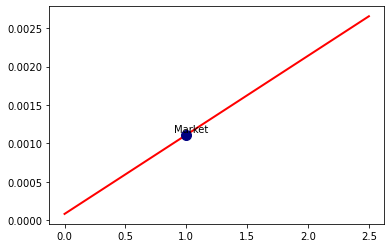

In [108]:
risk_free_rate = np.mean(R_F)

# We have two coordinates that we use to map the SML: (0, risk-free rate) and (1, market return)

eqn_of_the_line = lambda x : ( (np.mean(M)-risk_free_rate) / 1.0) * x + risk_free_rate        
xrange = np.linspace(0., 2.5, num=2)
plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

plt.plot([1], [np.mean(M)], marker='o', color='navy', markersize=10)
plt.annotate('Market', xy=(1, np.mean(M)), xytext=(0.9, np.mean(M)+0.00004))


For more details on the CAPM, check out the [wikipedia page](https://en.wikipedia.org/wiki/Capital_asset_pricing_model).

### Arbitrage Pricing Theory

The CAPM, while widely used and studied, has many drawbacks. With strict, limiting assumptions, it does not hold up well in empirical tests. Arbitrage Pricing Theory (APT) aims to generalize the CAPM model, as assets may be exposed to classes of risks other than the market risk and investors may care about things other than just the mean and variance.

APT is a major asset pricing theory that relies on expressing the returns using a linear factor model:

$$R_i = a_i + b_{i1} F_1 + b_{i2} F_2 + \ldots + b_{iK} F_K + \epsilon_i$$

A factor is a return stream that is determined completely by some characteristic. For example, the CAPM has only one factor, market return. If we have modelled our rate of return as above, then the expected returns should take the form of:

$$ E(R_i) = R_F + b_{i1} \lambda_1 + b_{i2} \lambda_2 + \ldots + b_{iK} \lambda_K $$

where $R_F$ is the risk-free rate, and $\lambda_j$ is the risk premium - the return in excess of the risk-free rate - for factor $j$. This premium arises because investors require higher returns to compensate them for incurring higher risk.

We'll compute the risk premia for our factors with Fama-Macbeth regression. However, there are various ways to compute each $\lambda_j$!

### Arbitrage

Now that we have a reasonably general way to compute expected return, we can discuss arbitrage more technically. There are generally many, many securities in our universe. If we use different ones to compute the $\{\lambda_i\}$, will our results be consistent? If our results are inconsistent, there is an *arbitrage opportunity* (in expectation), an operation that earns a profit without incurring risk and with no net investment of money. In this case, we mean that there is a risk-free operation with *expected* positive return that requires no net investment. It occurs when expectations of returns are inconsistent, i.e. risk is not priced consistently across securities.

Say that there is an asset with expected rate of return 0.2 for the next year and a $\beta$ of 1.2 with the market, while the market is expected to have a rate of return of 0.1, and the risk-free rate on 1-year bonds is 0.05. Then the APT model tells us that the expected rate of return on the asset should be

$$ R_F + \beta \lambda = 0.05 + 1.2 (0.1 - 0.05) = 0.11$$

This does not agree with the prediction that the asset will have a rate of return of 0.2. So, if we buy \$100 of our asset, short \$120 of the market, and buy \$20 of bonds, we will have invested no net money and are not exposed to any systematic risk (we are market-neutral), but we expect to earn $0.2(100) - 0.1(120) + 0.05(20) = 9$ dollars at the end of the year.

The APT assumes that these opportunities will be taken advantage of until prices shift and the arbitrage opportunities disappear. That is, it assumes that there are arbitrageurs who have sufficient amounts of patience and capital. This provides a justification for the use of empirical factor models in pricing securities: if the model was inconsistent, there would be an arbitrage opportunity, and so the prices would adjust.

#### Goes Both Ways

Accurately knowing $E(R_i)$ is incredibly difficult, but this model tells us what the expected returns should be if the market is free of arbitrage. This lays the groundwork for strategies based on factor model ranking systems. If you have a model for the expected return of an asset, then you can rank those assets based on their expected performance and use this information to make trades. This creation of a ranking scheme is the hallmark of a long-short equity strategy.

## B. Position Sizing <a id="17"></a>

####  Probability forecast of a stock to outperform the general market   -->  The highest probabilities are converted into long and the lowest probabilities into short positionsin proportion to Confidence

The trading size determines our bet size and represents a crucial component of our trading system. Sizing rules have huge impact on our overall portfolio performance. However, efficient position sizing is difficult. One of the problems with effective position sizing arises from fat-tailed distributions that can severely impact our results.

The trading size determines our bet size and represents a crucial component of our trading system. Sizing rules have huge impact on our overall portfolio performance. However, efficient position sizing is difficult. One of the problems with effective position sizing arises from fat-tailed distributions that can severely impact our results.
<br><br>


<blockquote>
    <p>If you want to make an impression at a board meeting employ the figure of speech now sweeping the economic world: “But what about the fat tail?” This is another way of asking “How come all you geniuses didn’t realize the risk you were running?” Embarrassed witnesses and recently fired C.E.O.’s explain that the distribution of values and risks long beloved by managers, credit-rating agencies and securities analysts turned out to be not so normal after all.</p>
    <footer> William Safire. Fat Tail.  <cite>The New York Times Magazine</cite></footer>
</blockquote>
<br><br>

Another problem is the lack of statistical robustness of many measures when applied to position sizing. It is important to be aware that position sizing can break or make a trading system.

## C. Leverage <a id="18"></a>

### What is leverage?

Leverage is borrowing money, then investing that money into some trading strategy so as to effectively multiply your initial capital base by some amount.

### More Specifically

Leverage is reinvesting debt to gain a greater return on an investment. We include debt in our asset portfolio as a financial instrument that pays one large cash flow upfront (the loan) and gradually pays negative cash flows out over time. The size of these negative cash flows is determined by the interest rate on our debt. The large upfront cashflow allows us to supplement our capital base. In this way we use our capital and our leverage together to purchase the assets necessary to execute our trading strategy.

### Why would you do this?

If you are confident in a strategy and believe it to be low risk, you can put more money than you currently have into that strategy in an effort to multiply your returns. You of course have to have confidence that the returns on your strategy will exceed the interest rate on your debt.

#### Risk Adjusted Returns

We'll talk about this more later, but risk adjusted return is expressed in the Sharpe Ratio (excess returns/risk). A strategy with a high Sharpe Ratio may not have good absolute returns, say $2\%$ annually, but if the Sharpe Ratio is high the risk will also be correspondingly low. Multiplying the capital base multiplies both the risk and returns of the strategy, keeping the Sharpe Ratio the same. See lower in the notebook for more.

### How do I use leverage?

In the context of algorithmic trading we are specifically interested in margin and trading on margin. Trading on margin is a type of leverage as it involves taking out a loan from your broker and adding it to your capital base in order to increase the returns of your trading strategy. Since you are borrowing money to invest, you ideally only trade on margin when the returns of your strategy are greater than the interest that you pay on that debt. At many points in the execution of a trading strategy, you may attempt to make trades that would exceed your current capital. At this point, the broker checks if you are authorized to trade on margin (borrow money) and, if so, lends you the money necessary to execute the trade. Each person’s margin account will have different terms depending on their broker, size of account, risk of strategies, and other factors. 

If you have a profitable strategy, using leverage can prop up the amount of money that you make overall by padding the money that you are working with. The involvement of the broker is an important factor to consider when constructing algorithmic trading strategies because your trading strategy will borrow automatically as needed when you need more money to cover a position. You may want to limit how much leverage your strategy can take on so that you are not borrowing more than you are comfortable with.

We measure the current leverage of a portfolio by examining the leverage ratio. The leverage ratio of an algorithm is calculated as the sum of your debt and your capital base divided by your capital base. We limit the amount of leverage that our strategy uses by limiting the leverage ratio.

$$ \text{Leverage Ratio} = \frac{\text{Debt} + \text{Capital Base}}{\text{Capital Base}}$$

Let's look at a very simple example of how introducing leverage can affect a portfolio. Consider a single period model, consisting of today and tomorrow, in which we receive our returns tomorrow.

In [95]:
from __future__ import division

In [96]:
capital_base = 100000
r_p = 0.05 # Aggregate performance of assets in the portfolio
r_no_lvg = capital_base * r_p
print ('Portfolio returns without leverage: {0}'.format(r_no_lvg))

Portfolio returns without leverage: 5000.0


This is what portfolio returns look like without leverage. Let's add some debt, leveraging the portfolio, and see how the returns change.

In [97]:
debt = 100000

r_lvg = (capital_base + debt) * r_p
r_lvg_pct = r_lvg / capital_base
# Returns are calculated over the initial capital base
# Think of the debt as an asset purchased and added to the portfolio
lvg_ratio = (debt + capital_base) / capital_base
print ('Portfolio returns with leverage: {0}'.format(r_lvg))
print ('Percentage returns with {1}x leverage: {0}'.format(r_lvg_pct, lvg_ratio))

Portfolio returns with leverage: 10000.0
Percentage returns with 2.0x leverage: 0.1


This is the ideal situation, that someone would lend you money without asking for anything in return. It results in double the effective additive returns of an unlevered strategy, which is just delightful. However, we know that in the real world there is no way that this would actually happen. Let's consider what happens when we add in the effects of an interest payment in our one-period model.

In [98]:
capital_base = 100000
debt = 50000
i = 0.02
r_p = 0.05

int_pmt = i * debt
r_lvg = (capital_base + debt) * r_p
r_total = r_lvg - int_pmt
r_pct_lvg = r_total / capital_base
lvg_ratio = (capital_base + debt) / capital_base
print ('Portfolio returns with leverage and interest: {0}'.format(r_total))
print ('Percentage returns with {1}x leverage and {2}% interest: {0}'.format(r_pct_lvg, lvg_ratio, i * 100))

Portfolio returns with leverage and interest: 6500.0
Percentage returns with 1.5x leverage and 2.0% interest: 0.065


That makes a lot more sense. It would be unreasonable for us to assume that we can add someone else's money to our portfolio without some sort of repayment schedule. Our returns are not as high as they were in the levered portfolio with no interest, but we are still gaining a greater amount of wealth by using leverage, despite the interest rates. As long as we have a reliable strategy that can make sufficient returns to offset the cost of debt we will be able to benefit from levering a portfolio.

Our additive returns have increased over our unlevered strategy, but overall we are gaining a lower percentage return. This is not entirely a bad thing, as with a larger amount of money to trade on we are able to add more overall value to our portfolio. However, if we are not careful with how we manage leverage, we could potentially end up spending all of our profits trying to pay off the interest that we accrued to make them in the first place.

This single-period model is only a small piece of the story. Loans are rarely, if ever, paid off in one period. Payments are spread out over the life of a loan, ensuring that you do not simply get the money for free. In this context, to properly earn a profit using the leverage, we obviously have to be making more money than we are paying out.

### How do I get leverage?

Naturally, borrowing money to do anything will incur interest payments and additional fees. When trading with leverage, or on margin, these loans will come from your broker. Many brokers are loathe to part with their cash without a good reason. Using leverage with high volatility strategies can be dangerous unless you have a high tolerance for risk. Even if you lose money, you still have to pay the broker!

The ratio is below $1$ when it is not using all of its base capital and it spikes above $1$ whenever it makes a trade on margin. The algorithm associated with this leverage ratio is a long-short equity algorithm based on a combination of fundamental factors. 
A key feature of this sort of strategy is that it can trade hundreds, sometimes even thousands of equities at once. As such, we run the risk of incurring some fairly large rebalancing costs, depending on how frequently we rebalance. This algorithm specifically rebalances on a monthly basis. As we can see on the above graph of the leverage ratio, a lot of the largest changes occur aroud the start of each month.

To see how the rebalancing structure and maximum leverage can affect the leverage ratio of the algorithm when it is executed, go into the the template and modify these parameters. Changing the type of algorithm will also drastically affect how it uses leverage. Feel free to experiment.

Things to try:
1. Change the timing of the rebalancing between daily, monthly, and weekly.
2. Modify the amount of leverage that the portfolio is allowed to take on
3. Restrict the universe that the algorithm trades within by applying more filters to your trading universe.
4. Instead of making all portfolio weights equally-weighted, use a portfolio optimization scheme like Markowitz or Mean Absolute Deviation portfolio optimization.


Here are the associated returns of this algorithm. The volatility of these returns is important to take into account when examining the leverage of a strategy.

Using leverage can be dangerous when you are dealing with a more volatile strategy. Because you are trading with borrowed money, we are on the hook to return it. We have to make sure that the broker gets his money back before we get our profit. If we end up in a position where we get a margin call, we have to pony up more funds if we want to hold our positions. Monitoring your strategy's volatility and ensuring you are only taking on palatable amounts of debt are key aspects of determining the quality of your trading strategy.

### Risk-Adjusted Returns

Comparing returns of different investment opportunities without taking risk into account is meaningless. Some return streams may be higher than others, but this may be due to the risks taken on rather than any merit in the strategy itself. Taking on higher risk should in theory lead to higher returns, but then how do we judge the quality of these returns for the amount of risk we have to handle? This is where risk-adjusted returns and methods of risk-adjustment come into play. If we adjust several return streams for risk then we can consider them on equal footing, independent of the risk. This allows us to effectively compare and determine which return streams are the best for a given desired risk profile.`

One of the most prominent risk-adjusted measures is the Sharpe Ratio, defined as follows.

$$ \text{Sharpe Ratio} = \frac{r_p - r_f}{\sigma_p} $$

The Sharpe Ratio essentially normalizes the returns of a portfolio, giving us a metric that we can use as a measure of quality relative to other revenue streams. A higher Sharpe Ratio indicates that you are getting more return relative to the risk that your strategy is taking on.

#### Compare Strategies by Sharpe Ratio and then Lever as Needed

In general you want to compare the Sharpe Ratio of two strategies you may be interested in. Pick the strategy with the better Sharpe Ratio and then use leverage to multiply the returns up to where you want them. Assuming constraints like capital capacity don't kick in, you can add more money through leverage and bring a $2\%$ per year strategy up to a $10\%$ per year strategy while maintaining the same Sharpe, or invest a fraction of your available capital to bring a $20\%$ per year strategy's risk down to acceptable levels.

#### Example

We'll show a simple example using real numbers.

In [99]:
# Note these are all expected returns. You need to validate that
# your strategy will continue to produce these returns and volatility using other methods.
# Just measuring historically is a very poor predictor of future performance.
# We'll for now assume you've already validated that you can expect to keep seeing numbers similar to these.

strat_A_ann_return = 0.22
strat_A_ann_vol = 0.15

strat_B_ann_return = 0.05
strat_B_ann_vol = 0.02

# We'll assume a risk free rate of 0.02
risk_free_rate = 0.02

print ('Strategy A Sharpe: %s' % ((strat_A_ann_return - risk_free_rate) / strat_A_ann_vol))
print ('Strategy B Sharpe: %s' % ((strat_B_ann_return - risk_free_rate) / strat_B_ann_vol))

# Add in leverage to B

leverage = 3
# Expressed in returns

print ('Strategy B Sharpe: %s' % (
    (strat_B_ann_return * leverage - risk_free_rate * leverage) / (strat_B_ann_vol * leverage)
))
print ('Strategy B Levered Annual Returns: %s' % (
    (strat_B_ann_return * leverage - risk_free_rate * leverage)
))

Strategy A Sharpe: 1.3333333333333335
Strategy B Sharpe: 1.5
Strategy B Sharpe: 1.5000000000000004
Strategy B Levered Annual Returns: 0.09000000000000002


#### Portfolio Re-Weighting

Portfolio weighting can be considered an example of applying leverage to a strategy. If you assign more of your portfolio weight to a strategy, you have upped the capital amount and multiplied both the returns and volatility. Likewise, if you have a strategy that has high returns but high volatility, you can provide it less weight so that you divide the volatility.

--- 
---

# Thank you for completing this lecture!

<hr>
<p> <center>Lecture by Jonas Gottal — This notebook is released exclusively for the <a href="https://www.tuinvest.de/">TU Investment Club e.V.</a></center></p>
